# Fluency Development in Child Second Language (L2)  Acquisition: Insights from the CHILDES English-L2 Paradis Corpus

I've always been fascinated by how children acquire multiple languages, especially at different stages of early development. As a trilingual speaker who learned each language at a different point in childhood, I'm particularly interested in how fluency evolves over time. This project allows me to explore second language fluency development in children, a process I can personally relate to, and understand how their language skills progress with increased exposure.

I ran my code in colab. So, first import the necessary libraries and mount google drive.

In [1]:
from google.colab import drive
import os
import re
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import Image

In [2]:
# Mount Google Drive
if not os.path.exists("/content/drive/MyDrive"):
    drive.mount('/content/drive')

# Define dataset path
PARADIS_FOLDER = "/content/drive/MyDrive/Yoni/Paradis/"

Mounted at /content/drive


This study looks at how fluency develops in children learning a second language (L2). I use the [CHILDES English-L2 Paradis Corpus](https://childes.talkbank.org/access/Biling/Paradis.html). The dataset includes language samples from 25 children aged 3 to 7 years, all learning English as a second language. Data collection was longitudinal, spanning five rounds, with 19 children contributing data across all rounds.

The goal is to examine how fluency develops in relation to children's age, exposure to English, and linguistic productivity.

**Fluency**  is defined as **the ability to produce speech with minimal disfluencies, such as pauses, fillers, and self-corrections.** I analyze these disfluencies alongside linguistic productivity, measured using Mean Length of Utterance (MLU) and Type-Token Ratio (TTR). MLU is calculated as the average number of words per utterance, excluding false starts and repetitions, and reflects the child's linguistic productivity. Statistical methods, including ANOVA, t-tests, and multiple regression, explore the effects of age, exposure to English, and linguistic productivity on fluency. K-means clustering identifies distinct fluency profiles within the dataset.


# **Dataset Overview: CHILDES English-L2 Paradis Corpus**

This dataset contains child speech data from the **CHILDES English-L2 Paradis Corpus**, which is used to analyze **fluency development** in second language acquisition. Below is an overview of the information contained in this dataset.

Participants in this study were children from newcomer (immigrant and refugee) families to Canada. The children started to learn English as a second language (L2) after their first language (L1) had been established, at 4;11 on average (range = 3;3--­7;5). Thus, these children are *sequential* and not simultaneous bilinguals. All the parents of the children were foreign born, but some of the children were Canadian born. The Canadian-­born children, according to parent report, were functionally monolingual in their L1 until they entered an English language preschool or school program. In the table below, “AOA” refers to the “age of arrival” of the child when the family immigrated. The number “1” indicates children who were Canadian born. The column “AOE” refers to the age of onset of English acquisition. All ages are in months. Each child's L1 and gender is also listed in the table below.

When the study started, the children were, on average, 5;6 years old with a mean of 9.5 months of exposure to their English L2 in a preschool or school program. Data was collected approximately every 6 months for 5 rounds. Children's ages and length of exposure to English in months are given in the table below for each round of data collection.



Run the code below to display a table summarizing the English-L2 Paradis Corpus

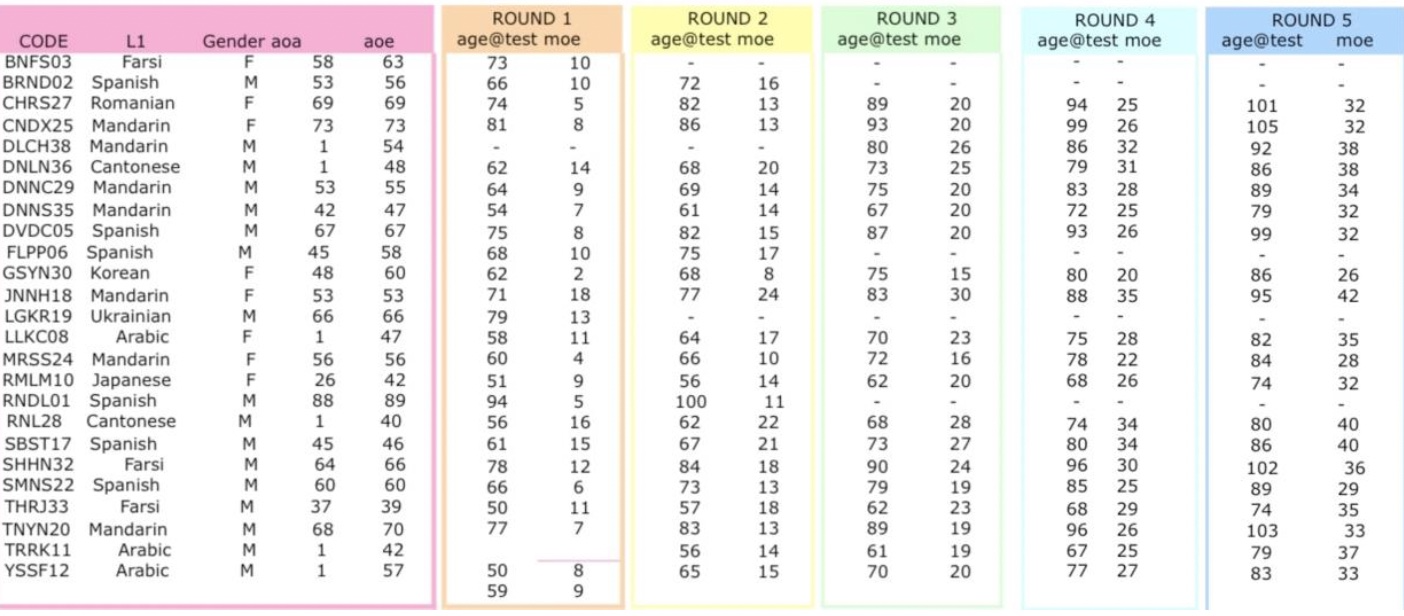

In [3]:
image_path = '/content/drive/MyDrive/Yoni/rounds.png'
Image(filename=image_path)

**List of questions used in the conversations with the children**
(Taken from https://childes.talkbank.org/access/Biling/Paradis.html )

NB: Not all children were asked all the questions.

1. How old are you?
2. When is your birthday? (If child doesn't know, ask them what time of year).
3. Did you / are you going to have a birthday party?
4. What happens at a birthday party?
5. Do you go to school?
6. If yes, what grade are you in? Who's your teacher?
7. What do you do at school?
8. What do you do at recess?
9. What's your favorite subject? Why?
10. What are the other kids at school like? (Tell me about the kids in your class)
11. Did you live somewhere else before you moved to Edmonton/Canada? If yes, can you tell me about it?
12. What is your favorite food? Can you tell me how to make it? (if no: What food do you know how to make? Do you know how to make a sandwich?)
13. Do you know what Halloween (or closest holiday) is? What are you going to be/were you for Halloween? What are you going to/did you do?
14. What would you like to be when you grow up? Why? Tell me what you're going to do when you're a ____________________.
15. Do you know what a fairy godmother is? What three things would you wish for if you had a fairy godmother? Why?
16. What games and toys do you like the best? Why? Tell me how to play _______________.
17. What was the last movie/video/TV program that you saw? Tell me what happened.
18. What did you do on the weekend/yesterday after school?
19. What are you going to do tonight? What are you going to do tomorrow after school?
20. Do you know what the four seasons are? What's your favourite season? Why? What can/can't you do in that season?





## **1. Child Speech Data**
- **Child's Speech Transcripts:**
    - These are the transcripts of child-adult interactions. The transcripts include the utterances the child and the adult produced as well as **pauses**, **fillers**, and **self-corrections**. The transcription is in **CHA format**.

## **2. Metadata Information**
- **@ID (Child's ID)**:
    - This is a **unique identifier** for each child in the dataset. The `@ID` line contains:
        - **Age** of the child (in years, months, and days).
        - **Gender** of the child (e.g., male, female).
        - **Child's unique ID number**.
- **@L1 of CHI (First Language)**:
    - The child's **first language (L1)** before they started learning English (e.g., Spanish, Arabic, etc.).
- **Months of Exposure to English**:
    - The number of **months** the child has been exposed to **English**.

## **3. Fluency-Related Information**
- **Disfluencies**:
    - **Pauses**: Instances where the child hesitates (e.g., "uh," "um").
    - **Filler Words**: Words that children use while thinking (e.g., "ah," "like").
    - **Self-Corrections**: Instances where the child changes or corrects their sentence mid-speech, marked by the transcription symbol   **"[///]"**.

## **4. Linguistic Complexity Measures**
- **Mean Length of Utterance (MLU)**:
    - The **average number of words** in the child's sentences. This measure helps us understand how complex the child's speech is.
- **Type-Token Ratio (TTR)**:
    - A measure of the **diversity of vocabulary** used by the child. It is calculated as the ratio of unique words to the total words used. A higher ratio suggests a richer vocabulary.

## **5. Transcripts Information**
- **Folder**:
    - Indicates the **round or session** in which the conversation took place (e.g., "Round 1", "Round 2"). The data contains five rounds for each child.
- **File Name**:
    - The **name of the file** containing the child's speech for each session.

## **6. Speech Features**
- **Speech Rate**:
    - This is the rate at which the child speaks, measured as the **total number of words** divided by the total time spent speaking (usually in minutes). It provides an indication of how fluent the child is while speaking.











**************************************



## **Questions**

I was particularly interested in understanding **disfluencies** — such as pauses, fillers, and self-corrections — which indicate how fluent children are while speaking. These are common in spontaneous speech and offer important clues about fluency development.

I also looked at **linguistic productivity**, which refers to how effectively a child uses language, measured by the variety and richness of their vocabulary. Specifically, **Type-Token Ratio (TTR)** quantifies lexical diversity, with higher TTR suggesting greater linguistic productivity.

In my analysis, I compared **TTR** with **MLU (Mean Length of Utterance)**, which reflects sentence length and complexity. MLU measures how many words a child typically uses in a sentence, serving as an indicator of fluency and productivity. A higher MLU suggests longer sentences but does not directly capture sentence structure complexity.

By examining both MLU and TTR, I can better understand how fluency and vocabulary use evolve as the child becomes more comfortable with English.

In this study, I explore how disfluencies, sentence length, and vocabulary interact and influence second language development, providing a clearer picture of how children's language skills grow over time.

I wanted to answer the following questions:

1. How do a child's age and exposure to English influence their fluency?
2. How do factors like sentence length and vocabulary contribute to fluency development?

By examining these factors, we can gain a clearer understanding of how children acquire a second language, which can inform educational strategies to better support young bilingual learners.

**********************************

## **Running the Code in This Notebook**

This notebook shows all the steps, including processing the data, analyzing fluency patterns, and exploring the effects of exposure, age, and complexity on L2 fluency development.  I use Python tools like pandas for data handling, matplotlib and seaborn for visualizing the data, and sklearn for clustering and statistical analysis.

Then I define regular expressions for **metadata extraction**.

In [4]:
ID_PATTERN = re.compile(r"@ID:\s+eng\|Paradis\|CHI\|(\d+);(\d+)\.(\d+)\|(\w+)\|")
L1_PATTERN = re.compile(r"@L1 of CHI:\s+(\w+)")
EXPOSURE_PATTERN = re.compile(r"Months of exposure to English:\s+(\d+)")

Next I define a function to **process a single .cha file**.

This function processes each `.cha` file from the **CHILDES English-L2 Paradis Corpus**, extracting child speech and relevant metadata.

- **Speech Extraction:** It identifies lines starting with `*CHI:` to gather the child's speech.
- **Metadata Extraction:** It uses regular expressions to extract the child's **age**, **gender**, **first language (L1)**, and **months of English exposure**.
- **Speech Features:** The function calculates:
  - **Disfluencies** (pauses, fillers, self-corrections)
  - **MLU (Mean Length of Utterance)** and **TTR (Type-Token Ratio)** for linguistic productivity.
  - **Disfluency rate**, **pause rate**, **filler word rate**, and **self-correction rate**.
- **Returns:** A dictionary with the child's speech data, fluency measures, and metadata.




In [5]:
# Update regex patterns
ID_PATTERN = re.compile(r"@ID:\s+eng\|Paradis\|CHI\|(\d+);(\d+)\.(\d+)\|(\w+)")  # Adjust regex to capture year, month, day, and gender
L1_PATTERN = re.compile(r"@L1 of CHI:\s+(\w+)")  # Extract first language
EXPOSURE_PATTERN = re.compile(r"Months of exposure to English:\s+(\d+)")  # Capture months of exposure

def process_cha_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    child_speech = []
    age_years, age_months, age_days, gender, first_language, months_of_english = None, None, None, None, None, None
    total_words = 0
    total_sentences = 0

    for line in lines:
        if line.startswith("*CHI:"):
            speech = line.split(":", 1)[1].strip()
            child_speech.append(speech)

            # Counting words and sentences
            words = re.findall(r"\b\w+\b", speech)  # Extract words
            total_words += len(words)  # Count total words
            total_sentences += max(len(re.split(r"[.!?]", speech)), 1)  # Count total sentences

        # Extract metadata
        id_match = ID_PATTERN.search(line)
        if id_match:
            age_years, age_months, age_days, gender = id_match.groups()
            age_years, age_months, age_days = map(int, [age_years, age_months, age_days])

        l1_match = L1_PATTERN.search(line)
        if l1_match:
            first_language = l1_match.group(1)

        exposure_match = EXPOSURE_PATTERN.search(line)
        if exposure_match:
            months_of_english = int(exposure_match.group(1))

    # Joining all collected child speech into one text string
    speech_text = " ".join(child_speech)

    # Counting disfluencies
    num_pauses = len(re.findall(r"\(\.\)|\(..\)", speech_text))
    num_fillers = len(re.findall(r"&-um|&ah|&mm", speech_text))
    num_self_corrections = len(re.findall(r"\[///\]", speech_text))

    # Calculate Mean Length of Utterance (MLU) and Type-Token Ratio (TTR)
    mlu = total_words / total_sentences if total_sentences > 0 else 0
    ttr = len(set(re.findall(r"\b\w+\b", speech_text))) / total_words if total_words > 0 else 0

    # Approximate speech rate (words per sentence, since no time data available)
    speech_rate = total_words / total_sentences if total_sentences > 0 else 0

    # Calculate age at recording in years (age_years + age_months / 12)
    age_at_recording_years = age_years + (age_months / 12) if age_years is not None else None

    return {
        "file_name": os.path.basename(file_path),
        "folder": os.path.basename(os.path.dirname(file_path)),
        "total_words": total_words,
        "total_sentences": total_sentences,
        "num_pauses": num_pauses,
        "num_fillers": num_fillers,
        "num_self_corrections": num_self_corrections,
        "disfluency_rate": (num_pauses + num_fillers + num_self_corrections) / total_words if total_words > 0 else 0,
        "pause_rate": num_pauses / total_sentences if total_sentences > 0 else 0,
        "filler_word_rate": num_fillers / total_words if total_words > 0 else 0,
        "self_correction_rate": num_self_corrections / total_words if total_words > 0 else 0,
        "mlu": mlu,
        "ttr": ttr,
        "speech_rate": speech_rate,  # Estimated speech rate based on sentence count
        "age_at_recording_years": age_at_recording_years,
        "gender": gender,
        "first_language": first_language,
        "months_of_english": months_of_english
    }

### **Processing the `.cha` Files**

This section processes all the `.cha` files from the **CHILDES English-L2 Paradis Corpus** and extracts the relevant data for analysis.

- **Process Each File:**
  - Loop through the directory containing the `.cha` files.
  - For each `.cha` file, we call the **`process_cha_file`** function to extract speech features and metadata.


In [6]:
# Process all the .cha files:
results = []
for root, _, files in os.walk(PARADIS_FOLDER):
    for filename in files:
        if filename.endswith(".cha"):
            file_path = os.path.join(root, filename)
            results.append(process_cha_file(file_path))

df_disfluencies = pd.DataFrame(results)

# Initialize df_cleaned with df_disfluencies
df_cleaned = df_disfluencies.copy()

# Handling missing values for key features: disfluency_rate, mlu, and speech_rate
# First, fill NaNs for disfluency_rate, mlu, and speech_rate with their respective column mean
df_cleaned[["disfluency_rate", "mlu", "speech_rate"]] = df_cleaned[["disfluency_rate", "mlu", "speech_rate"]].fillna(df_cleaned[["disfluency_rate", "mlu", "speech_rate"]].mean())

# Ensure no NaN or Inf values before clustering
# Replace Inf/NaN values with NaN and then drop them
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

df_cleaned["speech_rate"] = df_cleaned["speech_rate"].fillna(0)  # Default to 0 if no speech_duration_seconds available

### **K-Means Clustering: Grouping Data Based on Fluency Features**

In this section, I apply **K-Means clustering** to group the data into distinct **fluency profiles** based on two key features: **disfluency rate** and **Mean Length of Utterance (MLU)**.

#### **What is K-Means Clustering?**
**K-Means clustering** is a method that groups things together based on how similar they are. Imagine you have a bunch of dots scattered on a piece of paper. The algorithm finds groups of dots that are close to each other. It does this by:
1. **Choosing starting points** (called "centers") for each group.
2. **Assigning data points** to the nearest center.
3. **Recalculating the center** based on the assigned points.
4. **Repeating the process** until the groups stabilize.

In machine learning terms, K-Means is an **unsupervised clustering algorithm**, meaning it groups data without prior labels. The final output identifies clusters of similar fluency patterns.


### **Steps in Clustering**
#### **1. Select Features for Clustering**
- We extract the relevant columns:  
  - **Disfluency Rate**: Measures the proportion of pauses, fillers, and self-corrections.  
  - **MLU**: Represents sentence length and linguistic productivity.  
- These features help us understand **how fluency and sentence complexity** relate.  
- We remove rows with missing values using `.dropna()` to ensure valid clustering.

#### **2. Standardize Features**
- **Standardization** ensures that both features contribute equally to the clustering process.
- Since **MLU and disfluency rate have different scales**, we use **StandardScaler** to transform the data so that each feature has a mean of 0 and a standard deviation of 1.

#### **3. Determine the Optimal Number of Clusters**
- The number of clusters (`n_clusters`) is an important parameter in K-Means.
- We initially set **n_clusters=3**, assuming three fluency groups (e.g., **low, medium, and high fluency**).
- However, the best number of clusters can be determined using:
  - **[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))**: A visual method that identifies the "elbow point" where adding more clusters stops improving the fit significantly.
  - **Silhouette Score**: Measures how well-separated the clusters are, with values closer to **1** indicating better-defined groups.

#### **4. Apply K-Means Clustering**
- The `fit_predict()` method is used to assign each data point to a **fluency cluster**.
- The assigned cluster labels are stored in a new column, **fluency_cluster**.
- The results help us analyze speech fluency **without needing predefined categories**, allowing the data to naturally group itself.

**The code for k-means clustering is provided below.**

Data is available for clustering.


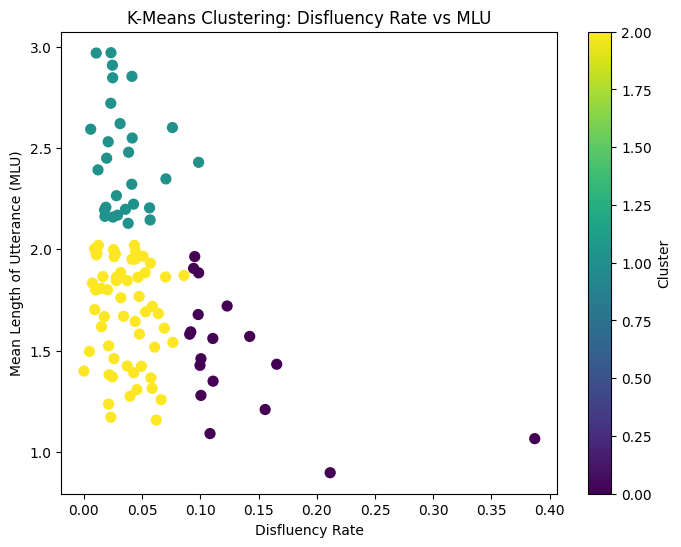

Cluster Centroids (Disfluency Rate, MLU):
[[ 1.58554384 -0.82217641]
 [-0.36135812  1.30631751]
 [-0.3231888  -0.38206518]]
                disfluency_rate                                          \
                          count      mean       std       min       25%   
fluency_cluster                                                           
0.0                        18.0  0.132525  0.071175  0.090909  0.098286   
1.0                        28.0  0.034656  0.021128  0.005892  0.020591   
2.0                        57.0  0.036575  0.020473  0.000000  0.021260   

                                                mlu                      \
                      50%       75%       max count      mean       std   
fluency_cluster                                                           
0.0              0.104459  0.137570  0.387168  18.0  1.481143  0.298513   
1.0              0.028460  0.041374  0.098557  28.0  2.451777  0.275174   
2.0              0.037148  0.050876  0.086003  57.

In [7]:
# Select the features for clustering
clustering_features = df_cleaned[["disfluency_rate", "mlu"]].dropna()

# Ensure there are enough samples to cluster
if len(clustering_features) > 0:
    print("Data is available for clustering.")
    scaler = StandardScaler()
    clustering_scaled = scaler.fit_transform(clustering_features)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_scaled)

    # Assign cluster labels to the DataFrame
    df_cleaned.loc[clustering_features.index, "fluency_cluster"] = cluster_labels

    # Visualize the clustering results
    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned["disfluency_rate"], df_cleaned["mlu"], c=df_cleaned["fluency_cluster"], cmap='viridis', s=50)
    plt.title("K-Means Clustering: Disfluency Rate vs MLU")
    plt.xlabel("Disfluency Rate")
    plt.ylabel("Mean Length of Utterance (MLU)")
    plt.colorbar(label="Cluster")
    plt.show()

    # Display cluster centroids
    cluster_centroids = kmeans.cluster_centers_
    print("Cluster Centroids (Disfluency Rate, MLU):")
    print(cluster_centroids)

    # Add the cluster labels to the dataframe as categorical
    df_cleaned['fluency_cluster'] = df_cleaned['fluency_cluster'].astype('category')

    # Group by cluster and compute summary statistics with observed=True
    cluster_summary = df_cleaned.groupby('fluency_cluster', observed=True)[["disfluency_rate", "mlu"]].describe()

    print(cluster_summary)

else:
    print("No valid data available for clustering.")

### **K-Means Clustering: Fluency Profiles Based on Disfluency Rate and MLU**

In this analysis, I used **K-Means clustering** to group the speech data into distinct **fluency profiles** based on two key features: **disfluency rate** and **MLU**. The clustering process resulted in three fluency clusters, which were visualized in a scatter plot showing **disfluency rate** on the x-axis and **MLU** on the y-axis.

#### **Key Observations:**

1. **Cluster 1 (Low Fluency):**
   - This group is characterized by **high disfluency rates** (around 0.13 on average) and **low MLU** (around 1.48). The **speech** in this cluster tends to have more pauses, fillers, and interruptions, with shorter and less complex sentences.
   - This suggests that children in this group may have less fluent speech with more hesitations and shorter utterances.

2. **Cluster 2 (Moderate Fluency):**
   - Children in this cluster have **moderate disfluency rates** (around 0.035) and **moderate MLU** (around 2.45). These children tend to have less disfluent speech and slightly longer, more complex sentences compared to Cluster 1.
   - This indicates that this group might be in a transitional phase where their speech is becoming more fluent but still contains some interruptions.

3. **Cluster 3 (High Fluency):**
   - This cluster shows **low disfluency rates** (around 0.037) and **high MLU** (around 1.68). The speech in this cluster is more fluent, with fewer disfluencies and longer, more complex utterances.
   - Children in this group demonstrate more fluent speech with minimal interruptions, suggesting more advanced language skills.

#### **Cluster Centroids:**
The centroids of the clusters provide the average values of **disfluency rate** and **MLU** for each group:
   - Cluster 1: High disfluency and low MLU.
   - Cluster 2: Moderate disfluency and moderate MLU.
   - Cluster 3: Low disfluency and high MLU.

(A centroid is the central point of a cluster, representing the average position of all the data points in that cluster.)

The clustering results show a pattern in which children with more fluent speech (lower disfluency rates, higher MLU) tend to exhibit longer and more complex utterances, while children with higher disfluency rates tend to produce shorter and simpler sentences. These findings suggest that **fluency** in speech is linked to **linguistic productivity**, with more fluent children displaying fewer interruptions and using longer sentences.


In [8]:
mlu_stats = df_cleaned["mlu"].describe()
mlu_stats["std"] = df_cleaned["mlu"].std()


### **Statistical Analysis: ANOVA for Fluency Metrics**

In this section, we perform **ANOVA** (Analysis of Variance) to examine how three key fluency metrics (**disfluency rate**, **MLU**, and **TTR**) vary across different **recording rounds** (represented by the **folder** column).

- **ANOVA Calculation:**
  - We use **`statsmodels`** to perform **ANOVA** for each metric. The ANOVA compares the average values of the metric across different **rounds** (i.e., different levels of the **folder** column).
  - The **p-value** generated by the ANOVA tells us whether the differences in the means across the rounds are statistically significant. A low p-value (typically < 0.05) indicates significant differences between the groups.

In [ ]:
# Define the metrics to analyze
metrics = ["disfluency_rate", "mlu", "ttr"]

# Initialize a dictionary to store the p-values for each metric
anova_results = {}

# Loop over each metric and perform ANOVA
for metric in metrics:
    try:
        # Perform ANOVA using the formula: metric ~ C(folder)
        model = ols(f"{metric} ~ C(folder)", data=df_cleaned).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Store the p-value for each metric
        anova_results[metric] = anova_table["PR(>F)"].iloc[0]
    except Exception as e:
        print(f"An error occurred while performing ANOVA for {metric}: {e}")

# Display the results
print(anova_results)

### **ANOVA Results Summary **  

The **ANOVA p-values** for disfluency rate, **Mean Length of Utterance (MLU),** and **Type-Token Ratio (TTR)** indicate significant differences across recording rounds, reflecting developmental changes in speech fluency.  


- **Disfluency Rate (p = 0.0063)**  
  Significant variation across recording rounds. A decreasing trend suggests improved fluency with fewer pauses, fillers, and self-corrections over time.  

- **MLU (p = 0.0097)**  
  Significant change in sentence length and complexity. As children gain exposure to English, they produce longer utterances.  

- **TTR (p = 0.000078)**  
  Highly significant increase in lexical diversity, indicating that children use a wider range of vocabulary as they progress.  

All three metrics show statistically significant differences, supporting the idea that **greater English exposure leads to improved fluency, longer sentences, and richer vocabulary.**

### **T-Test: Gender Differences in Fluency**

In this section, I perform a **T-test** to compare the **disfluency rates** between **male** and **female** children in the dataset. The T-test helps us assess whether there are statistically significant differences in fluency between genders.

- **T-test Calculation:**
  - I separate the data into two groups based on **gender**:
    - **male_fluency**: Disfluency rates for male children.
    - **female_fluency**: Disfluency rates for female children.
  - The **`stats.ttest_ind()`** function from **`scipy.stats`** is used to perform an independent two-sample T-test with **unequal variance** (since the variances might not be equal).

### **What is a T-test?**
A **T-test** is a statistical test used to compare the means (averages) of two groups to see if they are significantly different from each other. In our case, we're comparing the **disfluency rates** between male and female children.

- If the **T-test** returns a **low p-value** (typically less than 0.05), we can conclude that there is a statistically significant difference between the two groups, meaning the difference in fluency between male and female children is unlikely to have happened by chance.
- If the p-value is **high**, we cannot confidently say there's a significant difference between male and female fluency rates.

The test also assumes that the **disfluency rates** in both groups come from normal distributions, though it can still be valid with some deviation from normality, especially with large enough sample sizes.

In [9]:
# T-Test: Gender Differences in Fluency
male_fluency = df_cleaned[df_cleaned["gender"] == "male"]["disfluency_rate"]
female_fluency = df_cleaned[df_cleaned["gender"] == "female"]["disfluency_rate"]

# Perform the T-test
ttest_stat, ttest_p = stats.ttest_ind(male_fluency, female_fluency, equal_var=False)

# Output the results
print(f"T-test Statistic: {ttest_stat}")
print(f"P-value: {ttest_p}")

T-test Statistic: -1.851088987382067
P-value: 0.07099055153384126


Based on the results of the T-test:

- **T-test Statistic**: -1.85  
  This indicates that the difference in **disfluency rates** between male and female children is in the direction where male children tend to have a slightly higher disfluency rate. However, the magnitude of this difference isn't very large compared to the overall variability in the data.

- **P-value**: 0.071  
  Since the p-value (0.071) is greater than the commonly used significance threshold of 0.05, we **fail to reject the null hypothesis**. This means that, statistically speaking, we do not have enough evidence to conclude that there is a significant difference in fluency between male and female children in this dataset.

Although the T-test shows a slight difference in fluency between male and female children, the p-value indicates that the result is **not statistically significant** at the 0.05 level. Therefore, we cannot confidently say that gender affects disfluency rates based on this dataset.

### **Pearson Correlations**

I compute the **Pearson correlations** between several key variables in the dataset, including **age at recording**, **months of English exposure**, **disfluency rate**, **MLU**, and **TTR**.

- **What is Pearson Correlation?**
  - Pearson's correlation is a statistical method used to measure the **strength and direction of the linear relationship** between two variables.
  - It produces a value between **-1** and **+1**:
    - A **value of +1** indicates a perfect **positive correlation** (as one variable increases, the other also increases).
    - A **value of -1** indicates a perfect **negative correlation** (as one variable increases, the other decreases).
    - A **value of 0** indicates **no correlation** (there is no linear relationship between the two variables).
    
- **Pearson Correlation Calculation:**
  - I use **`df_cleaned.corr()`** to calculate the correlation matrix, which shows how strongly each pair of variables is related.
  - The output tells us whether, for example, as **age increases**, does the **disfluency rate** increase, decrease, or remain the same?

- **Example Interpretation:**
  - A positive correlation between **age and MLU** would indicate that, as children get older, their sentences tend to become longer and more complex. Conversely, a negative correlation would suggest that older children might use shorter sentences.


In [10]:
# Pearson Correlations
correlations = df_cleaned[["age_at_recording_years", "months_of_english", "disfluency_rate", "mlu", "ttr"]].corr()
# Output the result
print(correlations)

                        age_at_recording_years  months_of_english  \
age_at_recording_years                1.000000           0.526051   
months_of_english                     0.526051           1.000000   
disfluency_rate                      -0.274746          -0.184773   
mlu                                   0.343147           0.225855   
ttr                                   0.408887           0.410000   

                        disfluency_rate       mlu       ttr  
age_at_recording_years        -0.274746  0.343147  0.408887  
months_of_english             -0.184773  0.225855  0.410000  
disfluency_rate                1.000000 -0.404210  0.010906  
mlu                           -0.404210  1.000000  0.023980  
ttr                            0.010906  0.023980  1.000000  


Here’s a more **concise** and **clear** version of your Pearson correlation analysis:

---

### **Pearson Correlation Analysis**

The correlation matrix reveals key relationships between **age, English exposure, fluency, sentence complexity, and lexical diversity**:

#### **1. Age & English Exposure**
- **Age & Months of English (0.526)** --> **Moderate positive correlation**, indicating that older children naturally accumulate more English exposure.

#### **2. Disfluency Rate (Fluency)**
- **Age & Disfluency (-0.275)** --> **Weak negative correlation**, suggesting older children have fewer disfluencies.  
- **Months of English & Disfluency (-0.185)** --> **Weak negative correlation**, meaning more exposure slightly reduces disfluencies.  
- **MLU & Disfluency (-0.404)** --> **Moderate negative correlation**, showing that children with longer utterances tend to be more fluent.  
- **TTR & Disfluency (0.011)** --> **No meaningful correlation**, implying lexical diversity does not predict fluency.

#### **3. Mean Length of Utterance (MLU)**
- **Age & MLU (0.343)** → **Moderate positive correlation**, indicating that utterances lengthen as children grow.  
- **Months of English & MLU (0.226)** → **Weak positive correlation**, suggesting exposure plays a smaller role than age.  
- **MLU & TTR (0.024)** → **No strong relationship**, meaning sentence length and vocabulary diversity develop independently.

#### **4. Type-Token Ratio (TTR)**
- **Age & TTR (0.409)** --> **Moderate positive correlation**, meaning older children use a more diverse vocabulary.  
- **Months of English & TTR (0.410)** --> **Moderate positive correlation**, suggesting exposure expands vocabulary range.

To summarize,

-- Fluency (fewer disfluencies) improves with age & English exposure.
-- MLU is a strong fluency indicator: longer utterances are linked to fewer disfluencies.  
-- TTR is driven by both age & exposure, meaning vocabulary diversity grows over time.  
-- Fluency (low disfluency) is more tied to MLU than TTR, suggesting that sentence length predicts fluency better than lexical variety.



### **Regression Analysis**

In this section,I perform a **regression analysis** to understand how certain factors influence the **disfluency rate** — the rate at which children make interruptions like pauses, fillers, and self-corrections in their speech.

Before running the analysis,I address any missing data. Some rows in the dataset have missing values, so I remove those rows using **`.dropna()`** to ensure the data used in the analysis is complete.

Next, I use **Ordinary Least Squares (OLS) regression**, a statistical method that helps us figure out the relationship between several factors (called **independent variables**) and the **disfluency rate** (the **dependent variable**).

In this case, the independent variables include:
- **MLU**: The average number of words per sentence.
- **TTR**: A measure of vocabulary diversity.
- **Months of English exposure**: The amount of time the child has been learning English.

OLS regression helps us understand how each of these factors individually, and together, affects the disfluency rate. It gives us a formula to predict the disfluency rate based on the values of MLU, TTR, and months of exposure to English.

The result of this analysis will tell us which of these factors have the most significant impact on how fluent children are in their speech.

In [11]:
df_regression = df_cleaned[["mlu", "ttr", "months_of_english", "disfluency_rate"]].dropna()
X = sm.add_constant(df_regression[["mlu", "ttr", "months_of_english"]])
y = df_regression["disfluency_rate"]
reg_model = sm.OLS(y, X).fit()
# Display the regression results
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        disfluency_rate   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.098
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           0.000228
Time:                        01:53:57   Log-Likelihood:                 171.89
No. Observations:                 103   AIC:                            -335.8
Df Residuals:                      99   BIC:                            -325.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1263      0.029      4.399      0.000       0.069       0.183
mlu                  -0.0415      0.010     -4.013      0.000      -0.062      -0.021
ttr                   0.0841      0.115      0.729      0.468      -0.145       0.313
months_of_english    -0.0007      0.001     -1.260      0.211      -0.002       0.000
==============================================================================
Omnibus:                       91.729   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.896
Skew:                           2.774   Prob(JB):                    6.57e-244
Kurtosis:                      18.171   Cond. No.                         585.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **OLS Regression Summary: Disfluency Rate**  

The model explains **17.7%** of the variation in disfluency rate (R² = 0.177), though its predictive power is modest.  

- **MLU (-0.0415, p < 0.001)** --> **Strong negative effect**: longer utterances are linked to fewer disfluencies.  
- **TTR (0.0841, p = 0.468)** --> **No significant effect**: vocabulary diversity doesn’t strongly impact disfluency.  
- **Months of English (-0.0007, p = 0.211)** --> **No significant effect**: more exposure alone doesn’t reduce disfluencies.  

The data is **highly skewed**, which may impact accuracy, but **MLU is clearly the best predictor of fluency**.

## Visualizations

### **Visualizations: Feature Correlation Heatmap**

In this section, I create a **correlation heatmap** to visualize the relationships between different numerical features in the dataset. The heatmap helps me identify patterns and correlations between variables like **MLU**, **TTR**, **disfluency rate**, and **speech rate**.

- **Select Numeric Features:**
  - I select only the numeric columns from the DataFrame using **`select_dtypes(include=[np.number])`**, as correlations are computed only for numeric variables.


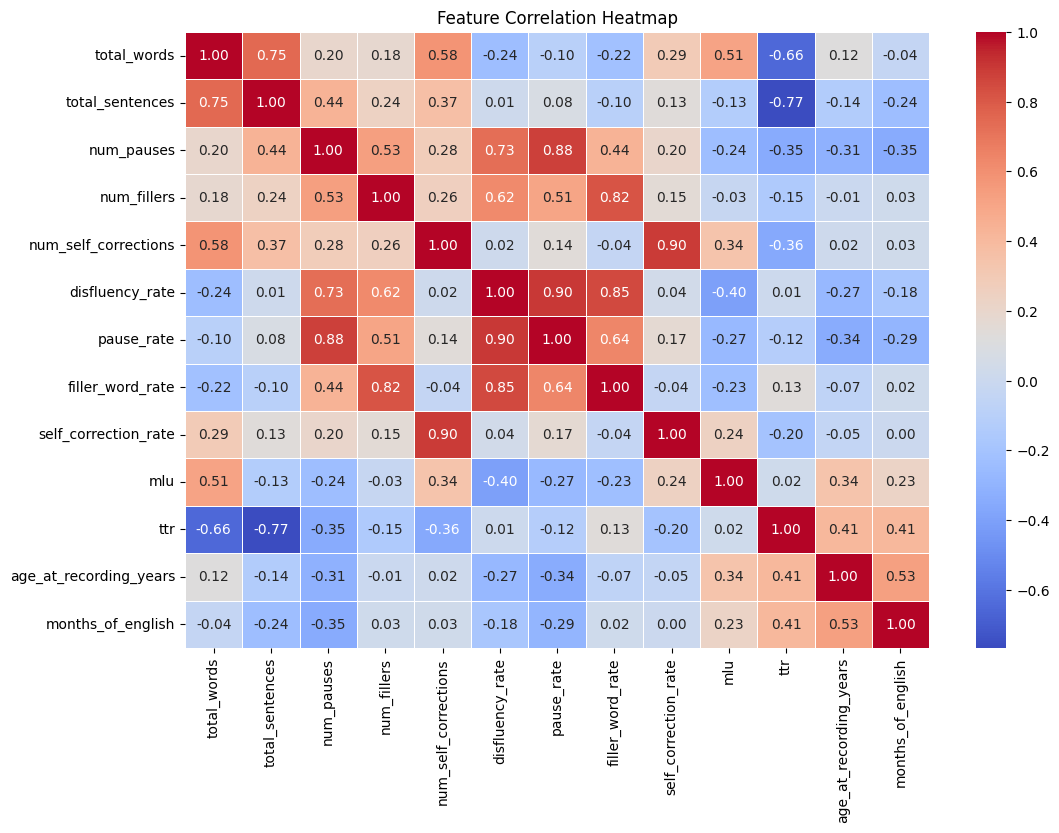

In [12]:
# List of all possible columns for clustering, including those that might be missing
numeric_columns = [
    "total_words", "total_sentences", "num_pauses", "num_fillers", "num_self_corrections",
    "disfluency_rate", "pause_rate", "filler_word_rate", "self_correction_rate",
    "mlu", "ttr", "speech_duration_seconds", "age_at_recording_years",
    "months_of_english"
]

# Ensure that we only use the columns that actually exist in the DataFrame
existing_columns = [col for col in numeric_columns if col in df_cleaned.columns]

# Select the existing numeric columns and drop rows with any NaN values
numeric_df = df_cleaned[existing_columns].dropna(axis=0, how="any")  # Drop rows with any NaN values

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

### **Feature Correlation Heatmap: Key Insights**

1. **Fluency and Disfluency Patterns:**
   - **Disfluency rate** is strongly correlated with:
     - **Pauses (0.73)**, **fillers (0.62)**, and **self-corrections (0.90)**, confirming that these contribute significantly to overall disfluency.
   - **MLU (Mean Length of Utterance) negatively correlates with disfluency (-0.40),** meaning longer utterances tend to have fewer interruptions.

2. **Linguistic Complexity:**
   - **MLU & Age (0.34), Months of English (0.23)**: Older children and those with more English exposure produce longer utterances.
   - **TTR (Type-Token Ratio) & Age (0.34), Months of English (0.41):** Vocabulary diversity increases with both age and exposure.

3. **Total Words and Sentence Structure:**
   - **Total words & Total sentences (0.75)**: Longer speech samples naturally include more sentences.
   - **Total words & MLU (0.51)**: More words correspond to longer utterances.

4. **Fluency and Exposure:**
   - **Months of English & Age (0.53):** Older children generally have more English exposure.
   - **Disfluency rate weakly negatively correlates with months of English (-0.18),** suggesting fluency improves over time but with variability.


- **More exposure to English and older age are linked to longer, more complex, and more fluent speech.**
- **Disfluency is primarily driven by pauses, fillers, and self-corrections.**
- **Lexical diversity (TTR) improves with age and exposure but does not strongly affect disfluency.**
- **MLU is a strong fluency indicator, showing an inverse relationship with disfluency.**

## **Histogram of Disfluency Rate**

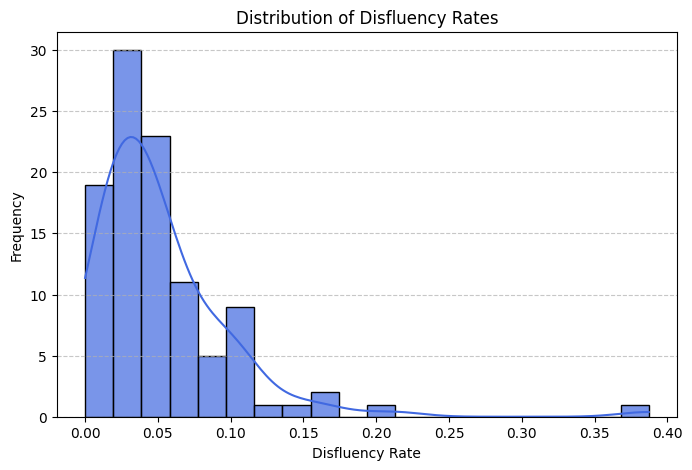

In [13]:
# Histogram of Disfluency Rates
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["disfluency_rate"], bins=20, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.xlabel("Disfluency Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Disfluency Rates")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for better readability
plt.show()

### **Distribution of Disfluency Rates: Analysis**###

The histogram above displays the distribution of **disfluency rates** across the dataset. Here are the key observations:

1. **Skewed Distribution:**
   - The distribution appears **right-skewed**, meaning most children have **lower disfluency rates**, with fewer instances of **high disfluency rates**.
   - This suggests that the majority of the speech samples contain **relatively few disfluencies** (e.g., pauses, fillers, self-corrections).

2. **Most Frequent Disfluency Rates:**
   - The highest concentration of speech samples is around the **lower end of the disfluency rate spectrum** (close to 0.02 - 0.05).
   - This indicates that **most children exhibit relatively fluent speech**, with only a small proportion having significantly higher disfluency rates.

3. **Presence of Outliers:**
   - A few cases show **much higher disfluency rates** (e.g., exceeding 0.15 - 0.20), meaning some children exhibit **frequent speech interruptions**.
   - These outliers may represent children who are still acquiring fluency or those with unique speech characteristics.

4. **KDE Curve Insights:**
   - The **KDE (Kernel Density Estimation) curve** provides a smoothed estimate of the probability distribution.
   - The peak around **0.03 - 0.05** confirms that most samples have **low disfluency rates**, with a gradual decline in frequency as disfluency rates increase.

5. **Possible Explanations:**
   - **Age and Language Exposure:** Children with **longer English exposure** may show **lower disfluency rates**, leading to the leftward concentration.
   - **Linguistic Productivity:** More **productive utterances (higher MLU)** might contribute to a slight increase in disfluencies, but the majority of children still show relatively smooth speech patterns.


What do we learn from here:

- The majority of children speak fluently with low disfluency rates.
- A small subset of children exhibits high disfluency rates, possibly due to developing fluency, cognitive factors, or speech characteristics.
- The distribution is right-skewed, meaning high-disfluency cases are less frequent.
- This distribution aligns with previous clustering results, where higher fluency clusters corresponded to lower disfluency rates.

### **Compare Fluency by Cluster**

The boxplot will show whether the low fluency cluster tends to have higher disfluency rates compared to the high fluency cluster, supporting our earlier assumption about the relationship between fluency and disfluency.

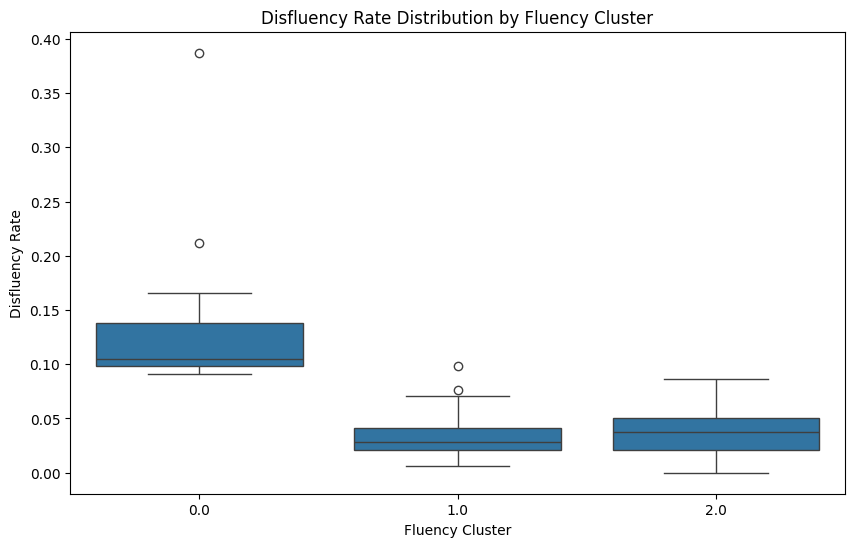

In [14]:
# Boxplot of disfluency rate by fluency cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x="fluency_cluster", y="disfluency_rate", data=df_cleaned)
plt.title("Disfluency Rate Distribution by Fluency Cluster")
plt.xlabel("Fluency Cluster")
plt.ylabel("Disfluency Rate")
plt.show()

The boxplot above  confirms that fluency clusters effectively separate speakers by disfluency rate, with Cluster 0 exhibiting the highest disfluency, Cluster 1 showing moderate disfluency, and Cluster 2 representing the most fluent speakers with the lowest disfluency rates.

### **Disfluency by Gender**

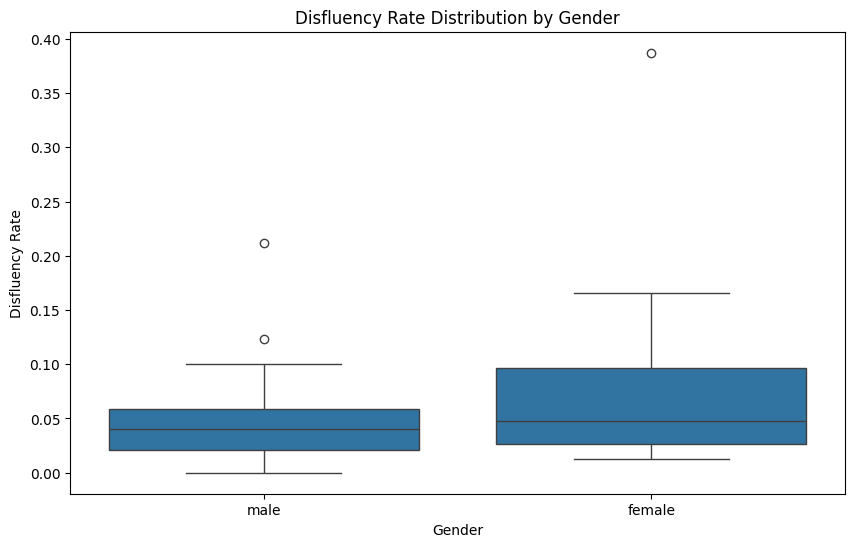

In [15]:
# Boxplot of disfluency rate by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="disfluency_rate", data=df_cleaned)
plt.title("Disfluency Rate Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Disfluency Rate")
plt.show()

The boxplot above suggests that female learners exhibit a wider range of disfluency rates with higher variability and more extreme outliers compared to male learners, who tend to have a lower and more consistent disfluency rate.

### **Disfluency Rate vs. Age at Recording**

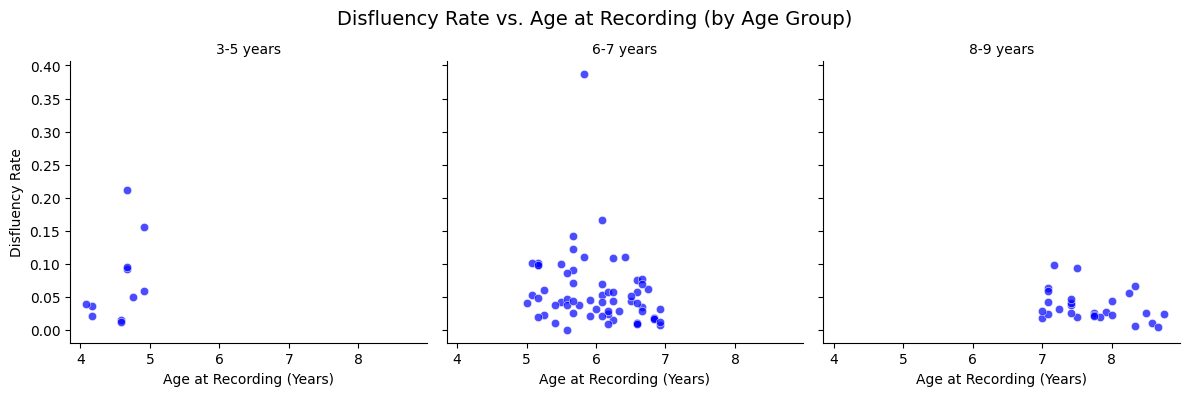

In [16]:
# Define age bins for grouping
age_bins = [3.5, 5, 7, 9]  # Number of bins should be one more than labels
age_labels = ['3-5 years', '6-7 years', '8-9 years']  # Correct number of labels

# Create a new column for age categories
df_cleaned['age_group'] = pd.cut(df_cleaned['age_at_recording_years'], bins=age_bins, labels=age_labels, right=False)

# Set up the FacetGrid with smaller plot size
g = sns.FacetGrid(df_cleaned, col='age_group', col_wrap=3, height=4)

# Map scatter plots onto the grid
g.map(sns.scatterplot, 'age_at_recording_years', 'disfluency_rate', color='blue', alpha=0.7)

# Add titles and labels
g.set_axis_labels("Age at Recording (Years)", "Disfluency Rate")
g.set_titles("{col_name}")

plt.suptitle("Disfluency Rate vs. Age at Recording (by Age Group)", size=14)
plt.subplots_adjust(top=0.85)  # Adjust title to avoid overlap
plt.show()

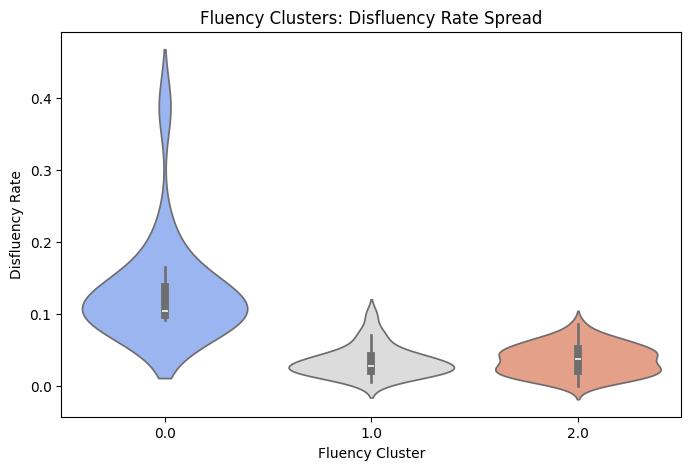

In [17]:
# Violin Plot of Fluency Clusters
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_cleaned, x="fluency_cluster", y="disfluency_rate", hue="fluency_cluster", palette="coolwarm", legend=False)
plt.xlabel("Fluency Cluster")
plt.ylabel("Disfluency Rate")
plt.title("Fluency Clusters: Disfluency Rate Spread")
plt.show()

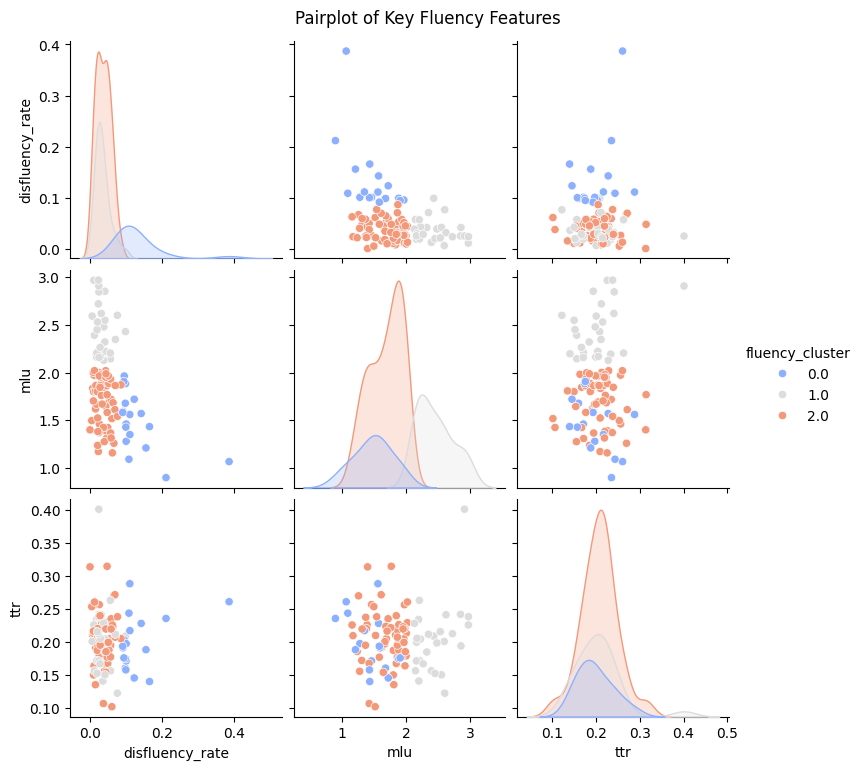

In [18]:
# Pairplot of Key Features
sns.pairplot(df_cleaned, vars=["disfluency_rate", "mlu", "ttr"], hue="fluency_cluster", palette="coolwarm")
plt.suptitle("Pairplot of Key Fluency Features", y=1.02)
plt.show()

The pairplot above provides a visual summary of the relationships between key fluency features — **disfluency rate**, **MLU**, and **TTR** — across different fluency clusters. Below are some interesting observations:

### **Key Insights:**

1. **Disfluency Rate and Fluency Clusters:**
   - The **blue points (fluency cluster 0)**, representing children with lower fluency, tend to have higher disfluency rates.
   - The **red points (fluency cluster 2)**, representing children with higher fluency, show significantly lower disfluency rates.
   - **Cluster 1 (gray)** appears to show intermediate levels of disfluency, indicating a spectrum of fluency across the groups.

2. **MLU and Disfluency Rate:**
   - The **blue cluster** (low fluency) tends to have a higher disfluency rate and **lower MLU**.
   - **Red cluster** (high fluency) exhibits a **stronger relationship** between higher MLU and lower disfluency rate, which suggests that more fluent speakers produce longer, more complex utterances with fewer interruptions.

3. **MLU vs. TTR:**
   - **MLU and TTR** show some degree of overlap but not a very strong relationship. Children with higher MLU tend to have **slightly lower TTR**, possibly indicating a trade-off between complexity of sentence structure (MLU) and vocabulary variety (TTR).
   - The **red points (high fluency)** have a relatively lower TTR compared to **blue points (low fluency)**, indicating that fluency may come with slightly less lexical diversity, possibly due to repeating familiar words in longer utterances.

4. **Clusters and Speech Features:**
   - **Fluency cluster 0 (blue)** tends to have the highest disfluency rate and lower MLU, while **cluster 2 (red)** shows the opposite: lower disfluency and higher MLU.
   - **Cluster 1 (gray)** shows some overlap with both, indicating that some children may have moderate fluency characteristics.

This plot suggests that **more fluent children (red)** produce **longer utterances (higher MLU)** with **fewer disfluencies**, while children with **lower fluency (blue)** tend to make more disfluencies and produce shorter utterances. The **intermediate group (gray)** shows mixed characteristics.

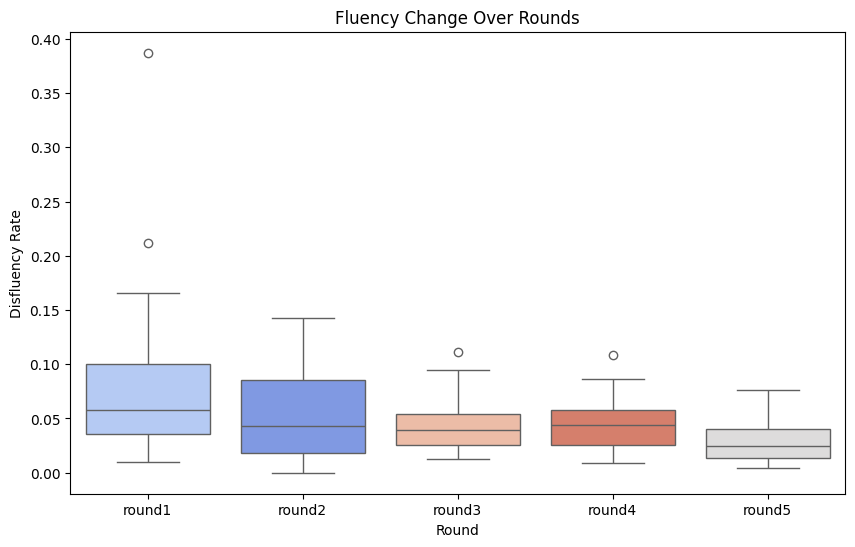

In [19]:
plt.figure(figsize=(10, 6))
round_order = ["round1", "round2", "round3", "round4", "round5"]  # Adjust if needed
sns.boxplot(data=df_cleaned, x="folder", y="disfluency_rate", hue="folder",
            palette="coolwarm", order=round_order, legend=False)
plt.xlabel("Round")
plt.ylabel("Disfluency Rate")
plt.title("Fluency Change Over Rounds")
plt.show()

This pattern supports the expected fluency development trajectory -- children's speech becomes smoother, with fewer disfluencies, as they gain more experience in English. The decreasing variability also suggests a convergence towards more stable fluency levels over time.

## Does L1 affect L2 learning?

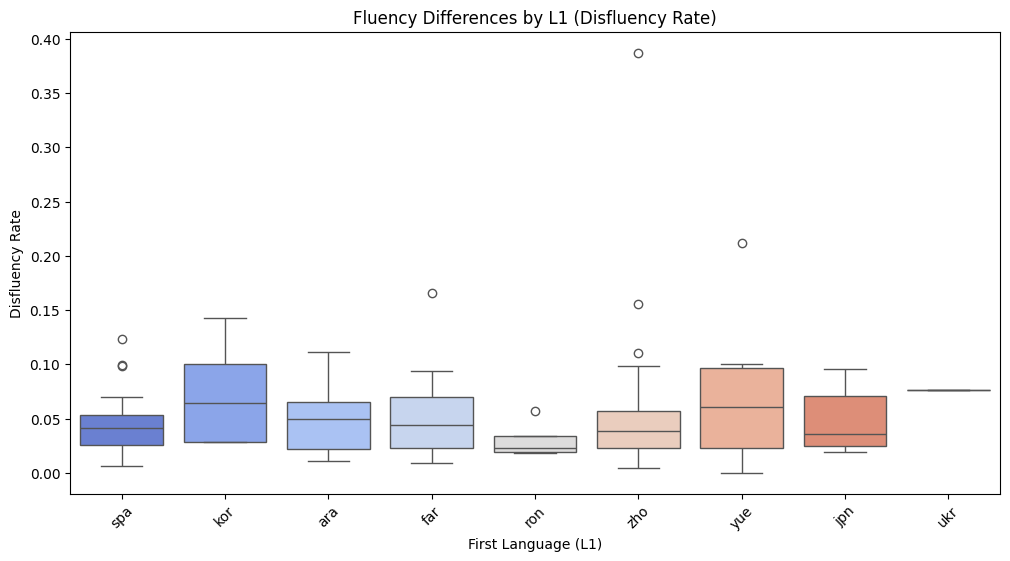

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="first_language", y="disfluency_rate", hue="first_language", palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.xlabel("First Language (L1)")
plt.ylabel("Disfluency Rate")
plt.title("Fluency Differences by L1 (Disfluency Rate)")
plt.legend([],[], frameon=False)  # Remove the redundant legend
plt.show()

The boxplot  above illustrates differences in disfluency rates across children with different L1 backgrounds. Korean (kor), Yue (yue), and Mandarin (zho) exhibit higher disfluency rates and greater variability, suggesting possible L1 transfer effects or differences in L2 processing.

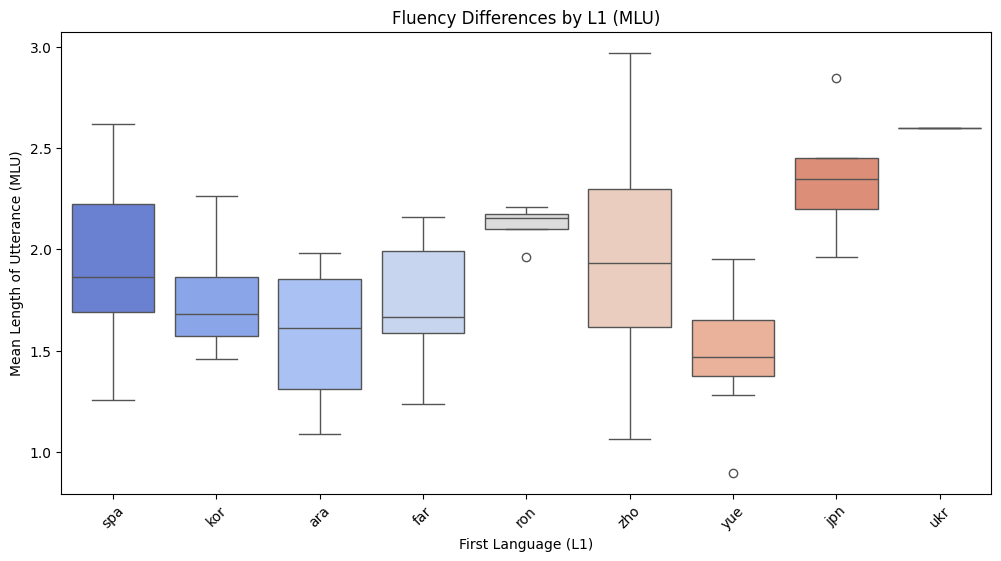

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="first_language", y="mlu", hue="first_language", palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.xlabel("First Language (L1)")
plt.ylabel("Mean Length of Utterance (MLU)")
plt.title("Fluency Differences by L1 (MLU)")
plt.show()

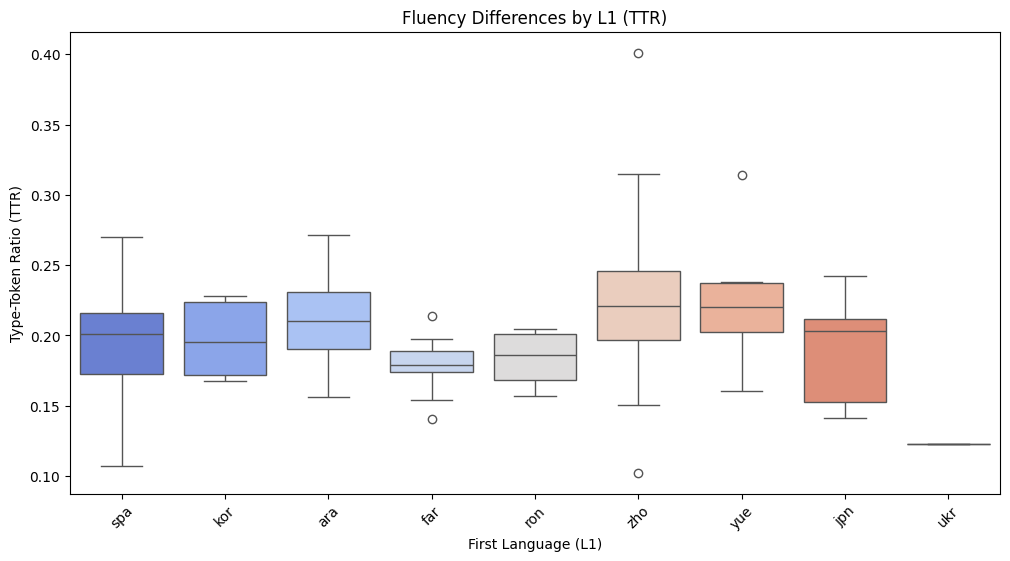

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="first_language", y="ttr", hue="first_language", palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.xlabel("First Language (L1)")
plt.ylabel("Type-Token Ratio (TTR)")
plt.title("Fluency Differences by L1 (TTR)")
plt.show()

This boxplot  above illustrates differences in MLU children with different L1 backgrounds. While most L1 groups show moderate MLU values, Mandarin (zho), Japanese (jpn), and Romanian (ron) exhibit higher MLU medians, suggesting that children from these backgrounds tend to produce longer utterances in English. In contrast,Yue (yue) and Korean (kor) show lower MLU values, with Yue displaying the shortest utterances overall. The wide variability in some groups, particularly Mandarin (zho) and Spanish (spa), indicates individual differences in linguistic productivity within these L1 populations.

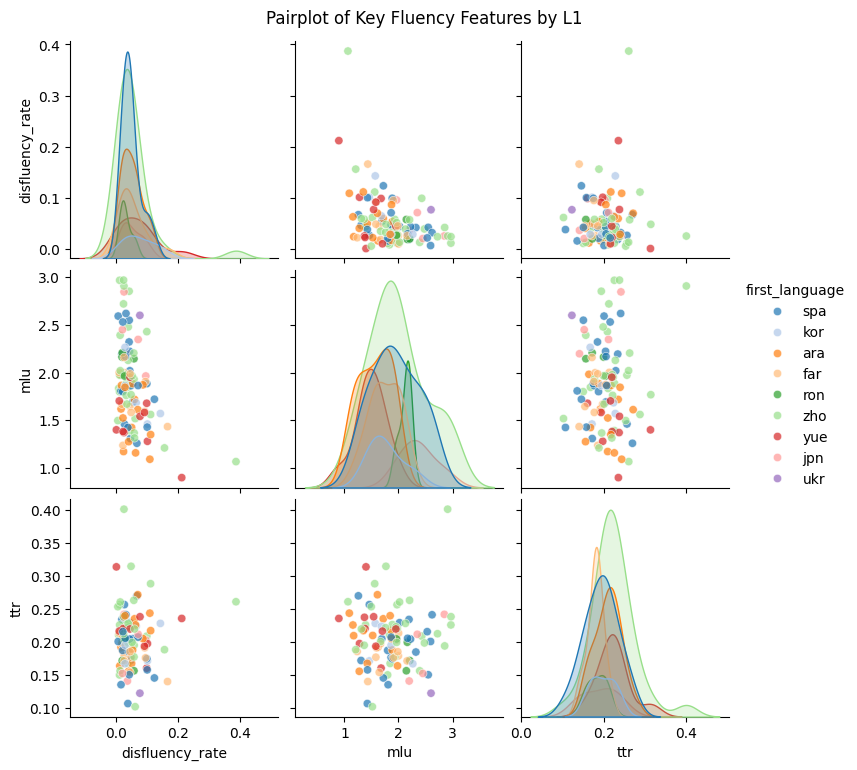

In [23]:
sns.pairplot(df_cleaned, vars=["disfluency_rate", "mlu", "ttr"], hue="first_language", palette="tab20", plot_kws={'alpha':0.7})
plt.suptitle("Pairplot of Key Fluency Features by L1", y=1.02)
plt.show()

Overall, the plot suggests significant differences in speech fluency and complexity across L1 groups, with Mandarin speakers showing the most fluency challenges (higher disfluency, higher MLU), while Spanish and Korean speakers display more fluent speech with simpler structures.

In [24]:
# # Print Results:
# df_results = pd.DataFrame({
#     "Total Files Processed": [len(df_cleaned)],
#     "Unique Rounds": [df_cleaned["folder"].nunique()],
#     "Fluency Clusters": [df_cleaned["fluency_cluster"].nunique()],
#     "ANOVA (Fluency by Round) p-value": [anova_results["disfluency_rate"]],
#     "T-Test (Gender Differences in Fluency) p-value": [ttest_p],
#     "Regression R² (Fluency Prediction)": [reg_model.rsquared]
# })

# print("\n Dataset Summary:")
# print(df_results.to_string(index=False))
# print("\n Pearson Correlations:\n", correlations)
# print("\n Multiple Regression Summary:\n", reg_model.summary())

# print("\n Full statistical analysis, visualizations, and clustering executed successfully!")


ANOVA Results for L1 Effects on Fluency:
                      sum_sq    df         F    PR(>F)
C(first_language)  0.007852   8.0  0.365502  0.936205
Residual           0.252424  94.0       NaN       NaN

 Tukey's Post-Hoc Test for L1 Differences:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   ara    far   0.0032    1.0 -0.0622 0.0685  False
   ara    jpn   -0.001    1.0  -0.086  0.084  False
   ara    kor   0.0225 0.9953 -0.0625 0.1074  False
   ara    ron  -0.0202 0.9988 -0.1128 0.0724  False
   ara    spa  -0.0037    1.0 -0.0594 0.0519  False
   ara    ukr   0.0259 0.9999  -0.144 0.1959  False
   ara    yue   0.0176 0.9956 -0.0496 0.0848  False
   ara    zho   0.0029    1.0 -0.0489 0.0546  False
   far    jpn  -0.0041    1.0 -0.0929 0.0846  False
   far    kor   0.0193 0.9988 -0.0694 0.1081  False
   far    ron  -0.0233 0.9974 -0.1194 0.0728  False
   far    spa  -0.0069

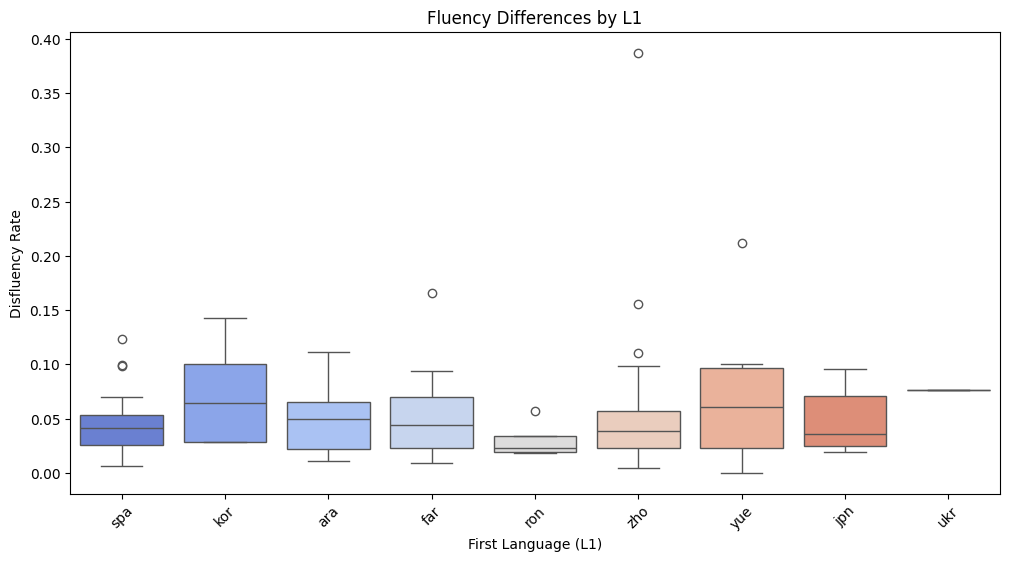

In [25]:
# ANALYSIS: L1 Effects on Fluency
# ANOVA to check if fluency differs significantly by L1
anova_l1 = sm.stats.anova_lm(ols("disfluency_rate ~ C(first_language)", data=df_cleaned).fit(), typ=2)
print("\nANOVA Results for L1 Effects on Fluency:\n", anova_l1)

# Tukey’s HSD Post-Hoc Test (only if ANOVA is significant)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_l1 = pairwise_tukeyhsd(df_cleaned["disfluency_rate"], df_cleaned["first_language"])
print("\n Tukey's Post-Hoc Test for L1 Differences:\n", tukey_l1)

# Boxplot of Disfluency Rate by L1
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="first_language", y="disfluency_rate", hue="first_language", palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.xlabel("First Language (L1)")
plt.ylabel("Disfluency Rate")
plt.title("Fluency Differences by L1")
plt.legend([],[], frameon=False)  # Hide the redundant legend
plt.show()


ANOVA (`p = 0.936`) and Tukey’s HSD show **no significant differences** in disfluency rates across L1 groups. While some variation exists (e.g., Korean and Yue slightly higher), it is **not statistically meaningful**. L1 does not appear to strongly influence fluency; factors like exposure and age may be more relevant.

In [ ]:
#  ANALYSIS: Nonlinear Fluency Thresholds
from patsy import dmatrix
import statsmodels.api as sm

# GAM (Generalized Additive Model) to capture nonlinear trends
x = df_cleaned["mlu"]
y = df_cleaned["disfluency_rate"]

# Fit spline-based GAM model
X_spline = dmatrix("bs(x, df=4, degree=3)", {"x": x}, return_type='dataframe')
gam_model = sm.OLS(y, X_spline).fit()

# Plot spline-based trend
x_sorted = np.linspace(x.min(), x.max(), 100)
X_spline_sorted = dmatrix("bs(x, df=4, degree=3)", {"x": x_sorted}, return_type='dataframe')

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label="Observed")
plt.plot(x_sorted, gam_model.predict(X_spline_sorted), color="red", linewidth=2, label="GAM Fit")
plt.xlabel("Mean Length of Utterance (MLU)")
plt.ylabel("Disfluency Rate")
plt.title("Nonlinear Relationship: MLU vs. Disfluency Rate")
plt.legend()
plt.show()

The plot visualizes a nonlinear relationship between MLU and Disfluency Rate. The Generalized Additive Model (GAM) fits a smooth curve, showing a decrease in disfluency rate as MLU increases. This suggests that longer utterances (more words per sentence) are associated with fewer disfluencies, implying that children with greater linguistic productivity tend to produce smoother speech with fewer interruptions or hesitations. This pattern aligns with the hypothesis that fluency improves as children become more proficient in their second language.


 Piecewise Regression for High MLU Group:
Slope: -0.0103, Intercept: 0.0592, R²: 0.0169, p-value: 0.5261

 Piecewise Regression for Mid-Low MLU Group:
Slope: -0.1906, Intercept: 0.3736, R²: 0.2505, p-value: 0.0092

 Piecewise Regression for Low MLU Group:
Slope: -0.2899, Intercept: 0.4603, R²: 0.2099, p-value: 0.0213

 Piecewise Regression for Mid-High MLU Group:
Slope: -0.0938, Intercept: 0.2279, R²: 0.0700, p-value: 0.2012
Skipping nan due to no data.


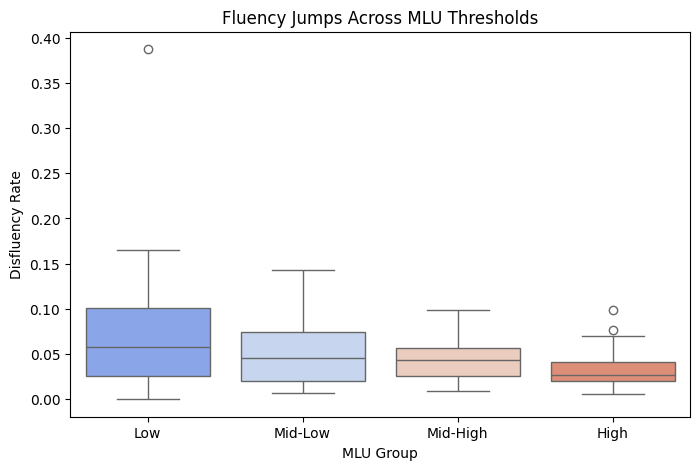

In [26]:
# Piecewise Regression: Fit different linear models in MLU segments
from scipy.stats import linregress

mlu_thresholds = np.percentile(df_cleaned["mlu"], [25, 50, 75])  # Split MLU into quartiles
df_cleaned["mlu_group"] = pd.cut(df_cleaned["mlu"], bins=[df_cleaned["mlu"].min()] + list(mlu_thresholds) + [df_cleaned["mlu"].max()], labels=["Low", "Mid-Low", "Mid-High", "High"])

# Run separate regressions for each MLU group
for group in df_cleaned["mlu_group"].unique():
    subset = df_cleaned[df_cleaned["mlu_group"] == group]

    # Skip empty groups to prevent errors
    if len(subset) == 0:
        print(f"Skipping {group} due to no data.")
        continue

    slope, intercept, r_value, p_value, std_err = linregress(subset["mlu"], subset["disfluency_rate"])
    print(f"\n Piecewise Regression for {group} MLU Group:")
    print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R²: {r_value**2:.4f}, p-value: {p_value:.4f}")


# Boxplot: Disfluency Rate Across MLU Segments
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x="mlu_group", y="disfluency_rate", hue="mlu_group", palette="coolwarm", legend=False)
plt.xlabel("MLU Group")
plt.ylabel("Disfluency Rate")
plt.title("Fluency Jumps Across MLU Thresholds")
plt.show()

The boxplot shows that disfluency rates decrease as MLU increases, with the Mid-Low and Low MLU groups showing significant reductions in disfluency, while the Mid-High and High groups exhibit minimal changes and lack statistical significance.

I return to the experiments here and try to explore further. Some imports are repeated here again so that we don't need to rerun everything above.

In [27]:
!pip install pylangacq pandas scikit-learn matplotlib seaborn
import pylangacq
import os
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 636.8 kB/s eta 0:00:00


In [28]:
# Mount Google Drive
from google.colab import drive
if not os.path.exists("/content/drive/MyDrive"):
    drive.mount('/content/drive')

In [29]:
# Corpus root path
path_to_cha_files = "/content/drive/MyDrive/Yoni/Paradis/"



# Get subfolders (e.g., round1/, round2/, ...)
round_dirs = [os.path.join(path_to_cha_files, d) for d in os.listdir(path_to_cha_files) if os.path.isdir(os.path.join(path_to_cha_files, d))]

# Load all .cha files round by round
corpora = []
for round_dir in round_dirs:
    corpora.append(pylangacq.read_chat(round_dir))

# Merge them into one corpus
corpus = corpora[0]
for c in corpora[1:]:
    corpus += c  # concatenate

# Get only child utterances
child_utterances = corpus.utterances(participants="CHI")

In [30]:
def extract_metrics(file):
    data = pylangacq.read_chat(file)
    utts = data.utterances(participants="CHI")

    words = []
    all_tokens = []
    disfluencies = 0

    for utt in utts:
        tokens = utt.tokens
        str_tokens = [str(tok) for tok in tokens]
        all_tokens.extend(str_tokens)
        words.append(" ".join(str_tokens))

        # Simple disfluency count using regex
        text = " ".join(str_tokens)
        disfluencies += len(re.findall(r'\(\(\w+|xxx|um|uh|er|uhm|[\/\[\]]', text.lower()))

    total_tokens = len(all_tokens)
    total_utterances = len(utts)
    unique_tokens = len(set(all_tokens))

    return {
        "filename": os.path.basename(file),
        "mlu": total_tokens / total_utterances if total_utterances else 0,
        "ttr": unique_tokens / total_tokens if total_tokens else 0,
        "disfluency_rate": disfluencies / total_utterances if total_utterances else 0,
        "num_utterances": total_utterances
    }

In [31]:
cha_files = []
for root, dirs, files in os.walk("/content/drive/MyDrive/Yoni/Paradis/"):
    for file in files:
        if file.endswith(".cha"):
            cha_files.append(os.path.join(root, file))

print(f"Found {len(cha_files)} .cha files.")
print(cha_files[:5])  # preview

Found 106 .cha files.
['/content/drive/MyDrive/Yoni/Paradis/round2/dvdc2.cha', '/content/drive/MyDrive/Yoni/Paradis/round2/gsyn2.cha', '/content/drive/MyDrive/Yoni/Paradis/round2/brnd2.cha', '/content/drive/MyDrive/Yoni/Paradis/round2/llkc2.cha', '/content/drive/MyDrive/Yoni/Paradis/round2/rndl2.cha']


In [32]:
results = pd.DataFrame([extract_metrics(f) for f in cha_files])

#results["child_id"] = results["filename"].str.extract(r"([a-z]{4})\d", expand=False)

results["child_id"] = results["filename"].str.extract(r"([a-z]{3,4})\d", flags=re.IGNORECASE)

results["round"] = results["filename"].str.extract(r"(\d)\.cha", expand=False).astype(int)

In [33]:
results[results["filename"].str.contains("rnl")]

,filename,mlu,ttr,disfluency_rate,num_utterances,child_id,round
18,rnl02.cha,4.181373,0.147128,0.215686,408,rnl,2
37,rnl01.cha,2.530120,0.194286,0.072289,415,rnl,1
64,rnl05.cha,3.865079,0.210130,0.126984,378,rnl,5
74,rnl03.cha,4.183962,0.167982,0.176887,424,rnl,3
91,rnl04.cha,4.559278,0.194460,0.208763,388,rnl,4


In [34]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
results["cluster"] = kmeans.fit_predict(results[["mlu", "ttr", "disfluency_rate"]])

# Regression
model = LinearRegression()
X = results[["mlu"]]
y = results["disfluency_rate"]
model.fit(X, y)
print("R²:", model.score(X, y))

R²: 0.47657368856743976


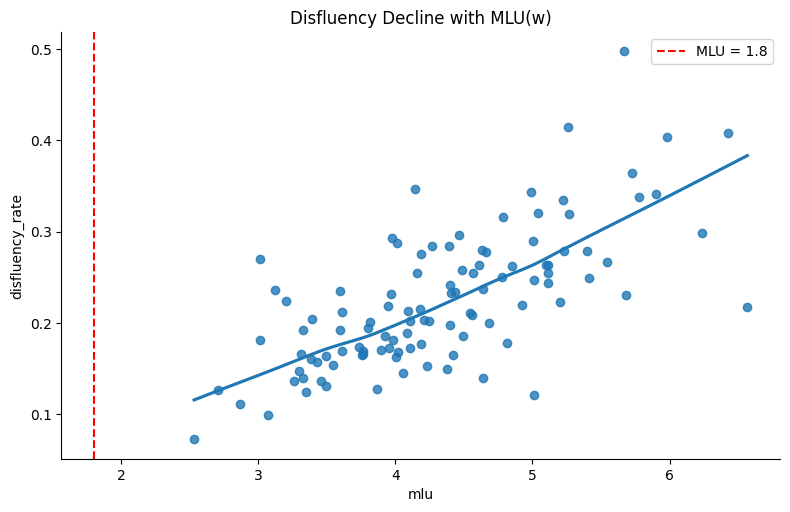

In [35]:
sns.lmplot(data=results, x="mlu", y="disfluency_rate", lowess=True, aspect=1.6)
plt.axvline(1.8, color="red", linestyle="--", label="MLU = 1.8")
plt.title("Disfluency Decline with MLU(w)")
plt.legend()
plt.show()

In [36]:
from scipy.stats import ttest_ind, f_oneway

# Example if you add gender or L1 later
# results['gender'] = ...
# results['L1'] = ...

# ANOVA across L1 groups
# f_oneway(*[group["disfluency_rate"] for name, group in results.groupby("L1")])

# T-test for gender difference
# ttest_ind(results[results.gender == "M"]["disfluency_rate"],
#           results[results.gender == "F"]["disfluency_rate"])

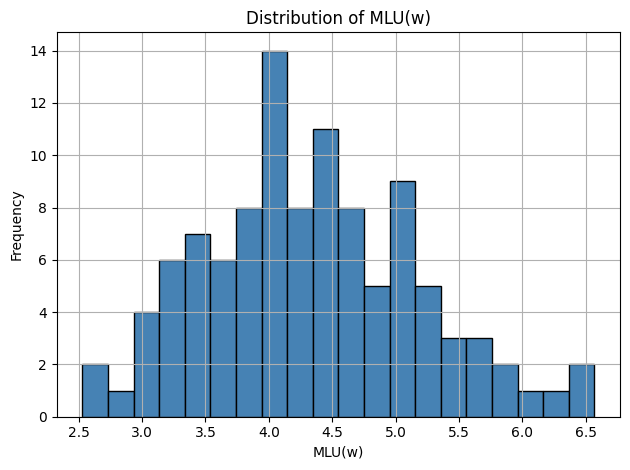

In [37]:
import matplotlib.pyplot as plt
results["mlu"].hist(bins=20, color='steelblue', edgecolor='black')
plt.title("Distribution of MLU(w)")
plt.xlabel("MLU(w)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np

results_sorted = results.sort_values("mlu")
X = results_sorted["mlu"].values.reshape(-1, 1)
y = results_sorted["disfluency_rate"].values

# Create binary variable for piecewise split
X_piece = np.hstack([X, (X > 3).astype(int)])

model = LinearRegression().fit(X_piece, y)
print("Coefficients:", model.coef_)

Coefficients: [0.05950081 0.02519352]


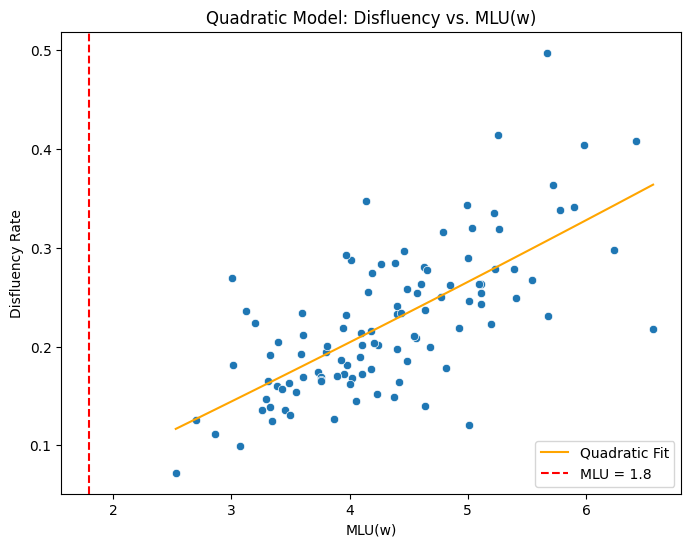

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Prepare data
X = results["mlu"].values.reshape(-1, 1)
X_quad = np.hstack([X, X**2])  # add quadratic term
y = results["disfluency_rate"].values

# Fit model
model = LinearRegression()
model.fit(X_quad, y)
y_pred = model.predict(X_quad)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=results["mlu"], y=results["disfluency_rate"])
sns.lineplot(x=results["mlu"], y=y_pred, color="orange", label="Quadratic Fit")
plt.axvline(1.8, color="red", linestyle="--", label="MLU = 1.8")
plt.xlabel("MLU(w)")
plt.ylabel("Disfluency Rate")
plt.title("Quadratic Model: Disfluency vs. MLU(w)")
plt.legend()
plt.show()

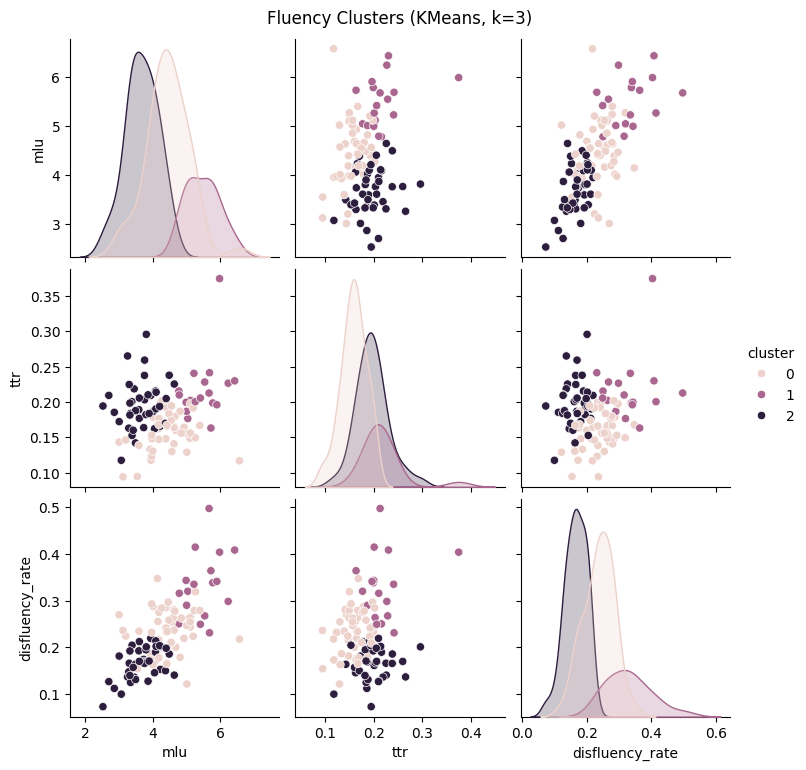

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
X_cluster = results[["mlu", "ttr", "disfluency_rate"]].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Fit clustering
kmeans = KMeans(n_clusters=3, random_state=42)
results.loc[X_cluster.index, "cluster"] = kmeans.fit_predict(X_scaled)

# Plot clusters
sns.pairplot(results, vars=["mlu", "ttr", "disfluency_rate"], hue="cluster")
plt.suptitle("Fluency Clusters (KMeans, k=3)", y=1.02)
plt.show()

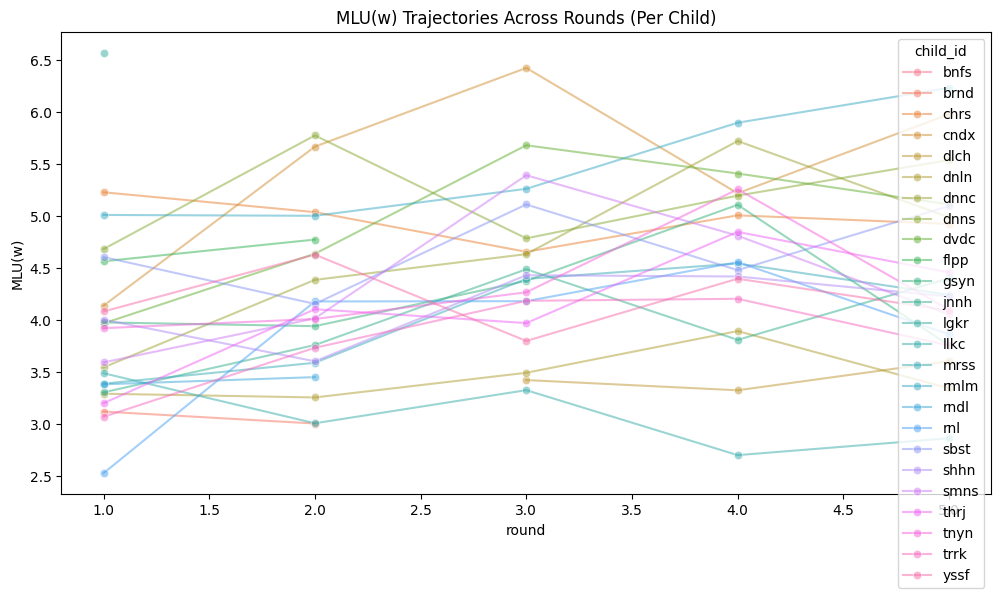

In [42]:
import seaborn as sns

# Sort and filter
results_long = results.sort_values(["child_id", "round"]).dropna(subset=["child_id", "round"])

# Plot per-child MLU over rounds
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_long, x="round", y="mlu", hue="child_id", marker="o", alpha=0.5)
plt.title("MLU(w) Trajectories Across Rounds (Per Child)")
plt.ylabel("MLU(w)")
plt.show()

/tmp/ipython-input-1832109916.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=results, x="round", y="disfluency_rate", ci=95)


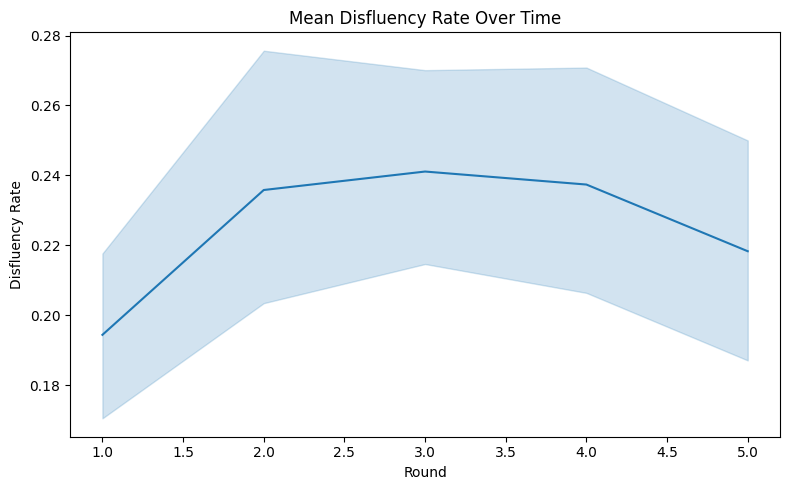

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by round and get mean disfluency rate
mean_disf_by_round = results.groupby("round")["disfluency_rate"].mean().reset_index()

# Optional: include confidence interval
plt.figure(figsize=(8, 5))
sns.lineplot(data=results, x="round", y="disfluency_rate", ci=95)
plt.title("Mean Disfluency Rate Over Time")
plt.xlabel("Round")
plt.ylabel("Disfluency Rate")
plt.tight_layout()
plt.show()

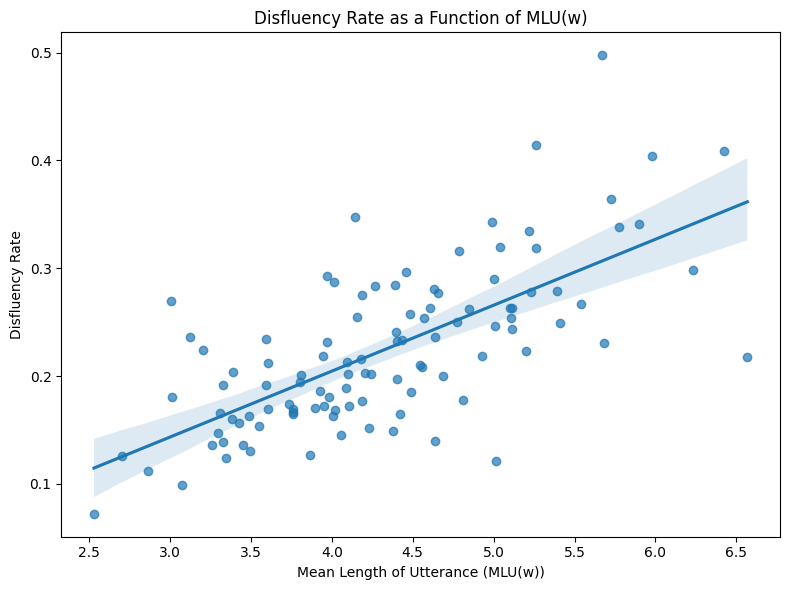

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=results, x="mlu", y="disfluency_rate", scatter_kws={'alpha':0.7})
plt.title("Disfluency Rate as a Function of MLU(w)")
plt.xlabel("Mean Length of Utterance (MLU(w))")
plt.ylabel("Disfluency Rate")
plt.tight_layout()
plt.show()

In [44]:
from scipy.stats import linregress

slopes = []

for child in results["child_id"].unique():
    subset = results[results["child_id"] == child]
    if len(subset) > 2:
        slope, intercept, r_value, p_value, std_err = linregress(subset["mlu"], subset["disfluency_rate"])
        slopes.append({
            "child_id": child,
            "slope": slope,
            "r": r_value,
            "p": p_value,
            "n_points": len(subset)
        })

# Convert to DataFrame
import pandas as pd
slope_df = pd.DataFrame(slopes)

# Show sorted result
slope_df_sorted = slope_df.sort_values("slope", ascending=False)
print(slope_df_sorted)

   child_id     slope         r         p  n_points
6      tnyn  0.150487  0.901076  0.036790         5
3      trrk  0.124835  0.902027  0.036267         5
19     dlch  0.104002  0.968304  0.160714         3
9      dnnc  0.098148  0.922947  0.025377         5
13     yssf  0.088283  0.749941  0.144343         5
18     rmlm  0.081446  0.515893  0.373572         5
2      llkc  0.073079  0.684512  0.202351         5
15      rnl  0.070543  0.918412  0.027630         5
12     dnns  0.062895  0.503552  0.387090         5
10     dnln  0.052207  0.756230  0.139075         5
1      gsyn  0.047652  0.607283  0.277364         5
16     cndx  0.038123  0.515858  0.373610         5
8      jnnh  0.036294  0.651234  0.233881         5
7      smns  0.035259  0.464828  0.430226         5
4      thrj  0.028885  0.339790  0.575841         5
5      chrs  0.027235  0.149457  0.810416         5
0      dvdc  0.022682  0.317607  0.602516         5
11     mrss  0.020367  0.559410  0.326861         5
17     sbst 

/tmp/ipython-input-1960215819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="child_id", y="slope", data=slope_df_sorted, palette="coolwarm")


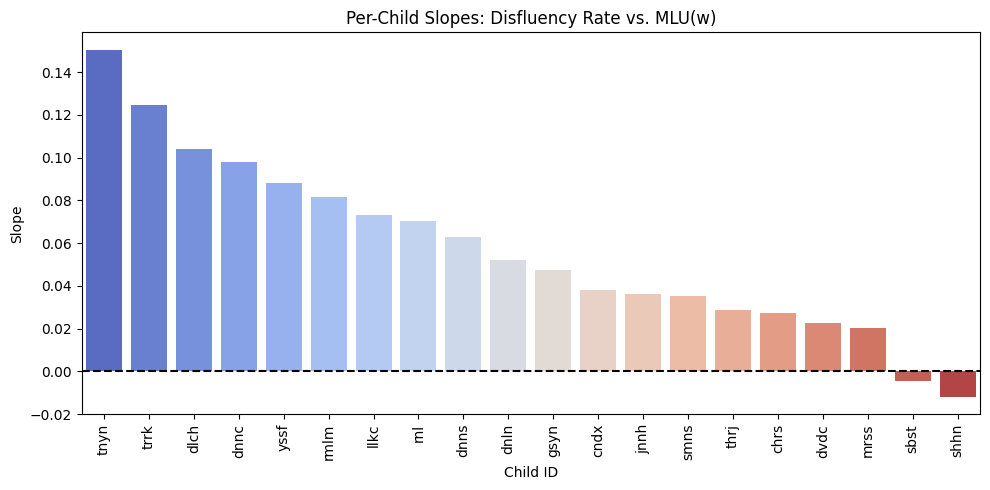

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by slope for readability
slope_df_sorted = slope_df.sort_values("slope", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="child_id", y="slope", data=slope_df_sorted, palette="coolwarm")
plt.axhline(0, color="black", linestyle="--")
plt.title("Per-Child Slopes: Disfluency Rate vs. MLU(w)")
plt.xlabel("Child ID")
plt.ylabel("Slope")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

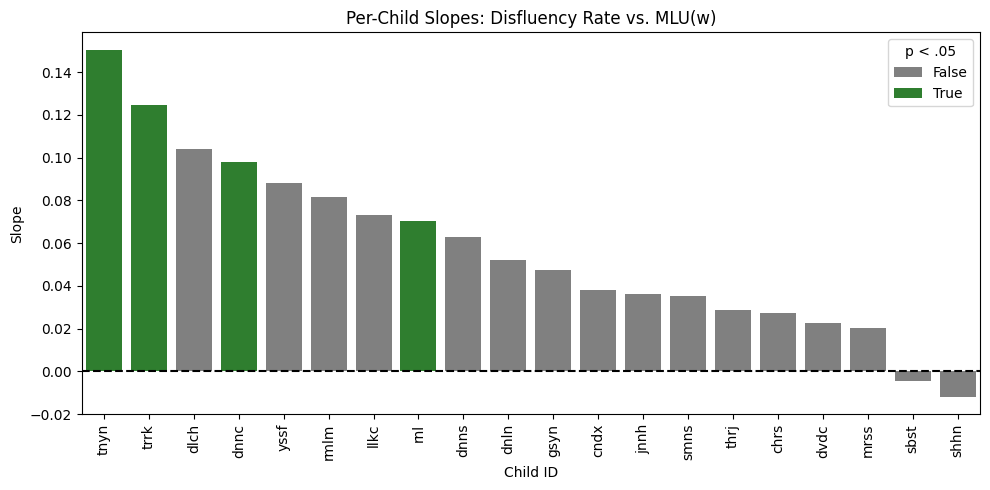

In [46]:
# Add a column to mark significance
slope_df_sorted["significant"] = slope_df_sorted["p"] < 0.05

plt.figure(figsize=(10, 5))
sns.barplot(
    x="child_id", y="slope", data=slope_df_sorted,
    hue="significant", dodge=False, palette={True: "forestgreen", False: "gray"}
)
plt.axhline(0, color="black", linestyle="--")
plt.title("Per-Child Slopes: Disfluency Rate vs. MLU(w)")
plt.xlabel("Child ID")
plt.ylabel("Slope")
plt.xticks(rotation=90)
plt.legend(title="p < .05", loc="upper right")
plt.tight_layout()
plt.show()

In [47]:
print("Number of .cha files:", len(results))  # total rows in histogram
print("Number of child-round aggregates:", results.groupby(['child_id', 'round'])['mlu'].mean().shape[0])

Number of .cha files: 106
Number of child-round aggregates: 106


In [49]:
# Check for rows that didn't yield valid child-round combinations
invalid_rows = results[results[["child_id", "round"]].isnull().any(axis=1)]
print(invalid_rows[["filename", "child_id", "round"]])

Empty DataFrame
Columns: [filename, child_id, round]
Index: []


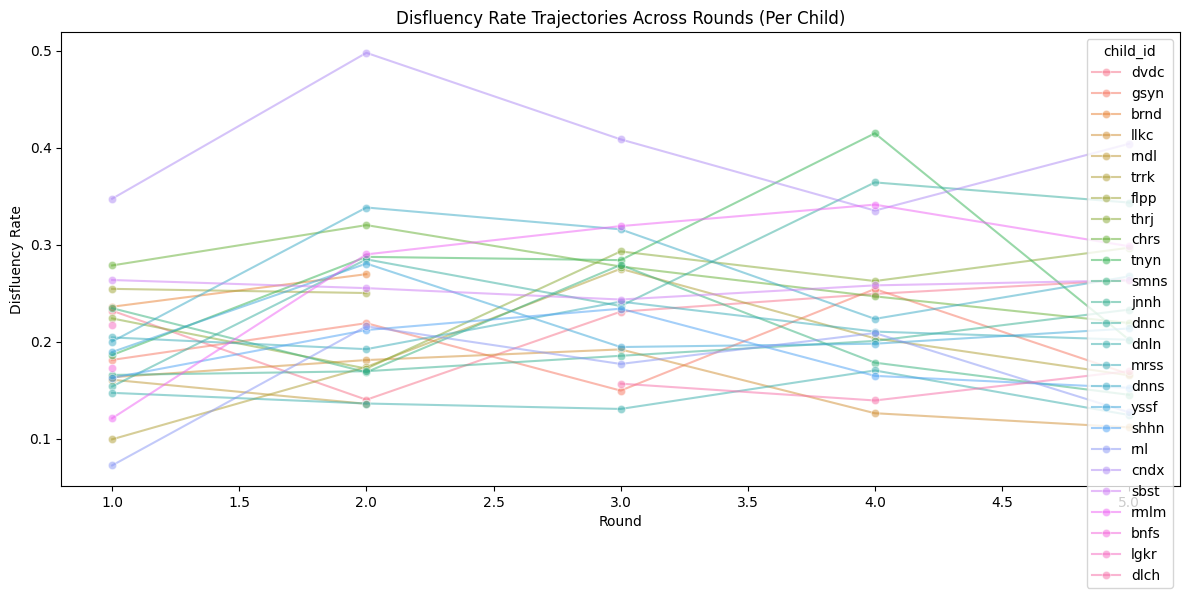

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=results, x="round", y="disfluency_rate", hue="child_id", marker="o", alpha=0.5)
plt.title("Disfluency Rate Trajectories Across Rounds (Per Child)")
plt.ylabel("Disfluency Rate")
plt.xlabel("Round")
plt.tight_layout()
plt.show()

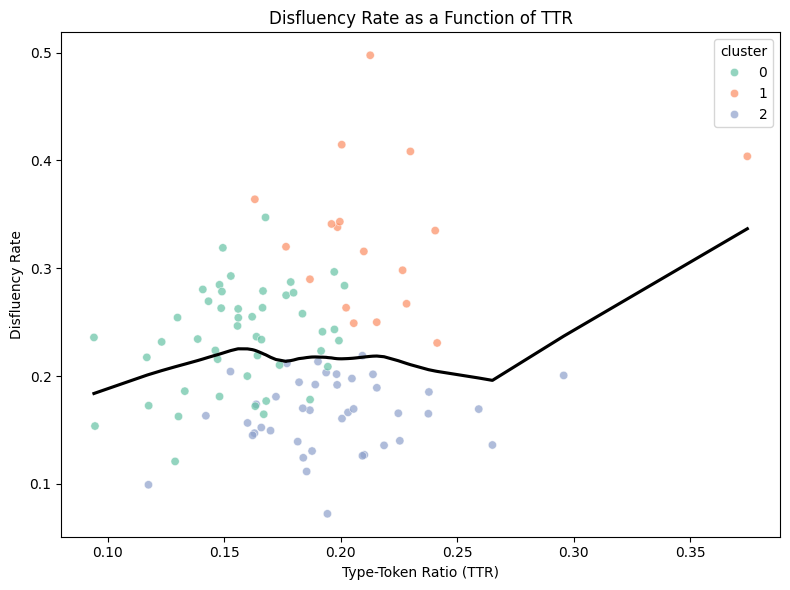

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results, x="ttr", y="disfluency_rate", hue="cluster", palette="Set2", alpha=0.7)
sns.regplot(data=results, x="ttr", y="disfluency_rate", scatter=False, lowess=True, color="black")
plt.title("Disfluency Rate as a Function of TTR")
plt.xlabel("Type-Token Ratio (TTR)")
plt.ylabel("Disfluency Rate")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3569895663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results, x="cluster", y="disfluency_rate", palette="pastel")


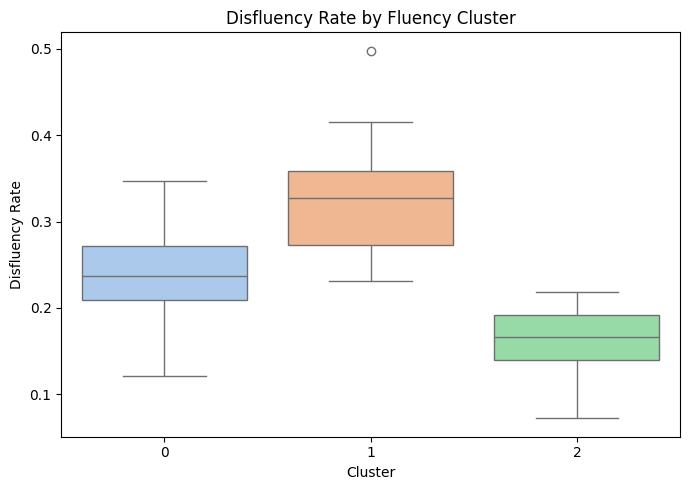

In [51]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=results, x="cluster", y="disfluency_rate", palette="pastel")
plt.title("Disfluency Rate by Fluency Cluster")
plt.xlabel("Cluster")
plt.ylabel("Disfluency Rate")
plt.tight_layout()
plt.show()

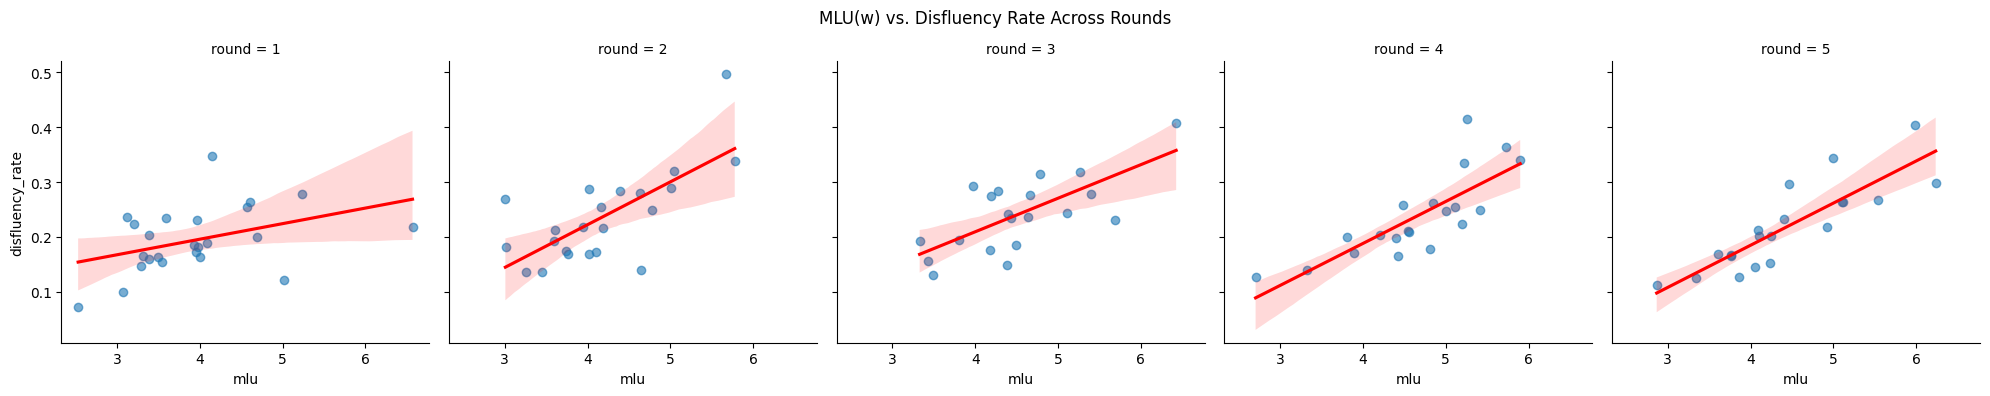

In [52]:
g = sns.lmplot(
    data=results, x="mlu", y="disfluency_rate", col="round",
    scatter_kws={"alpha":0.6}, line_kws={"color":"red"}, height=4, aspect=1
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("MLU(w) vs. Disfluency Rate Across Rounds")
plt.show()

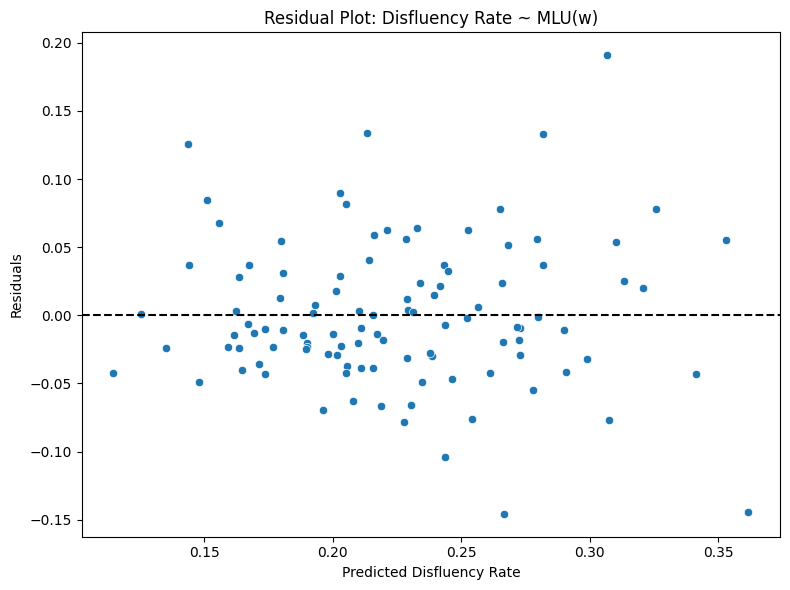

In [53]:
from sklearn.linear_model import LinearRegression

# Fit model
X = results["mlu"].values.reshape(-1, 1)
y = results["disfluency_rate"].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot: Disfluency Rate ~ MLU(w)")
plt.xlabel("Predicted Disfluency Rate")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [54]:
## Timing of Disfluency Peaks
# For each child, find the round where disfluency was highest
peak_disfluency = results.groupby("child_id").apply(lambda df: df.loc[df['disfluency_rate'].idxmax()])
print("Timing of Disfluency Peaks (round with highest disfluency):")
print(peak_disfluency[['child_id', 'round', 'disfluency_rate']])

Timing of Disfluency Peaks (round with highest disfluency):
         child_id  round  disfluency_rate
child_id                                 
bnfs         bnfs      1         0.172594
brnd         brnd      2         0.269450
chrs         chrs      2         0.320000
cndx         cndx      2         0.497608
dlch         dlch      5         0.169565
dnln         dnln      4         0.170175
dnnc         dnnc      4         0.364026
dnns         dnns      2         0.338150
dvdc         dvdc      5         0.263432
flpp         flpp      1         0.254300
gsyn         gsyn      4         0.254160
jnnh         jnnh      5         0.232919
lgkr         lgkr      1         0.217391
llkc         llkc      3         0.191882
mrss         mrss      3         0.241150
rmlm         rmlm      4         0.341121
rndl         rndl      1         0.160606
rnl           rnl      2         0.215686
sbst         sbst      1         0.263403
shhn         shhn      3         0.233840
smns         smn

/tmp/ipython-input-2555872898.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_disfluency = results.groupby("child_id").apply(lambda df: df.loc[df['disfluency_rate'].idxmax()])


In [55]:
## Plateau Identification in MLU(w)
# Identify if any children show plateau (little to no MLU growth between rounds)
results_sorted = results.sort_values(["child_id", "round"])
results_sorted['mlu_diff'] = results_sorted.groupby('child_id')['mlu'].diff()
plateauing = results_sorted.groupby('child_id')['mlu_diff'].apply(lambda x: (x.abs() < 0.2).sum())
print("Children with Plateau Behavior (low MLU change across rounds):")
print(plateauing)

Children with Plateau Behavior (low MLU change across rounds):
child_id
bnfs    0
brnd    1
chrs    2
cndx    0
dlch    1
dnln    1
dnnc    0
dnns    0
dvdc    0
flpp    0
gsyn    1
jnnh    0
lgkr    0
llkc    1
mrss    1
rmlm    1
rndl    1
rnl     1
sbst    0
shhn    2
smns    0
thrj    1
tnyn    1
trrk    1
yssf    0
Name: mlu_diff, dtype: int64


In [56]:
##  Nonlinear Growth Detection
# Compare linear vs quadratic fits
from sklearn.metrics import r2_score
X = results['round'].values.reshape(-1,1)
quadratic = np.hstack([X, X**2])

model_linear = LinearRegression().fit(X, results['mlu'])
model_quad = LinearRegression().fit(quadratic, results['mlu'])

print("R2 Linear Fit:", r2_score(results['mlu'], model_linear.predict(X)))
print("R2 Quadratic Fit:", r2_score(results['mlu'], model_quad.predict(quadratic)))

R2 Linear Fit: 0.06502270969026624
R2 Quadratic Fit: 0.08810363734956095


In [57]:
## Correlation Between TTR and Disfluency
correlation_ttr_disfluency = results['ttr'].corr(results['disfluency_rate'])
print("Correlation between TTR and Disfluency:", correlation_ttr_disfluency)

Correlation between TTR and Disfluency: 0.16536258230995904


In [58]:
## Early vs Late Starters
# Compare first-round MLU
early_vs_late = results[results['round'] == 1][['child_id', 'mlu']]
early_vs_late['starter_type'] = pd.cut(early_vs_late['mlu'], bins=[0,2.5,5], labels=['early', 'late'])
print("Early vs Late Starters Based on Initial MLU:")
print(early_vs_late)

Early vs Late Starters Based on Initial MLU:
   child_id       mlu starter_type
22     rndl  3.384848         late
23     rmlm  5.012950          NaN
24     jnnh  3.307432         late
25     gsyn  3.979695         late
26     llkc  3.491284         late
27     tnyn  3.924419         late
28     smns  3.595486         late
29     thrj  3.203285         late
30     brnd  3.122850         late
31     bnfs  3.951883         late
32     yssf  4.084942         late
33     chrs  5.230900          NaN
34     trrk  3.072153         late
35     dvdc  3.970506         late
36     dnln  3.294210         late
37      rnl  2.530120         late
38     flpp  4.567568         late
39     dnns  4.684906         late
40     shhn  4.006568         late
41     cndx  4.140800         late
42     dnnc  3.547492         late
43     mrss  3.390845         late
44     lgkr  6.568116          NaN
45     sbst  4.608392         late


In [59]:
## High vs Low Variability Children
# Standard deviation of MLU(w) across rounds per child
mlu_std = results.groupby('child_id')['mlu'].std().sort_values(ascending=False)
print("Children Ranked by MLU Variability (STD):")
print(mlu_std)

Children Ranked by MLU Variability (STD):
child_id
cndx    0.872126
dnnc    0.798790
rnl     0.785135
smns    0.719094
dvdc    0.676636
thrj    0.614634
rmlm    0.555973
tnyn    0.544083
gsyn    0.539189
mrss    0.511995
jnnh    0.491166
dnns    0.470359
trrk    0.461267
sbst    0.412333
shhn    0.345042
llkc    0.325248
yssf    0.319785
dnln    0.261195
chrs    0.208107
flpp    0.147499
dlch    0.141650
brnd    0.081501
rndl    0.048645
bnfs         NaN
lgkr         NaN
Name: mlu, dtype: float64


In [60]:
## Disfluency Type Proportion (if available)
# (We only have total disfluencies, no type breakdown in current pipeline)
print("Disfluency types (stall/revision) not available without further tagging.")

Disfluency types (stall/revision) not available without further tagging.


In [61]:
## Relationship Between Number of Utterances and Disfluency Rate
utterance_corr = results['num_utterances'].corr(results['disfluency_rate'])
print("Correlation between Number of Utterances and Disfluency Rate:", utterance_corr)

Correlation between Number of Utterances and Disfluency Rate: -0.11492068186526311


In [62]:
## Best Predictors of Disfluency: Regression
from sklearn.linear_model import LinearRegression

X = results[['mlu', 'ttr', 'num_utterances']]
y = results['disfluency_rate']
model = LinearRegression().fit(X, y)
print("Regression Coefficients (Predicting Disfluency):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Regression Coefficients (Predicting Disfluency):
mlu: 0.0610
ttr: -0.0432
num_utterances: -0.0000


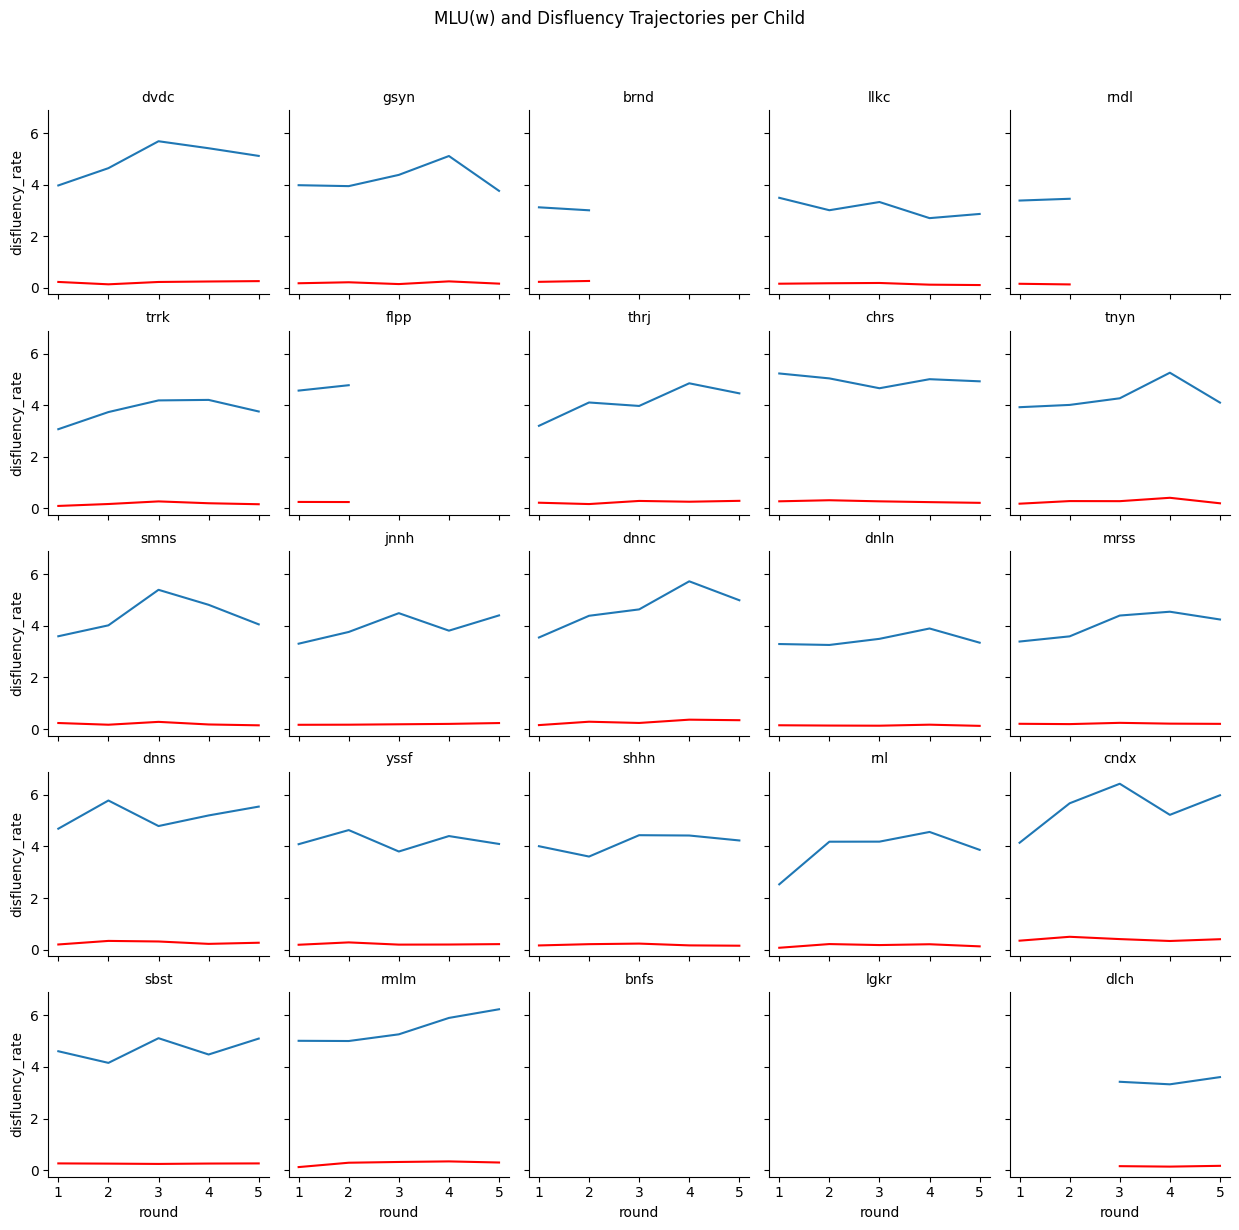

In [63]:
## Smoother Trajectories Per Child
# Plot MLU and Disfluency side-by-side for each child
import matplotlib.pyplot as plt

g = sns.FacetGrid(results, col="child_id", col_wrap=5, height=2.5)
g.map_dataframe(sns.lineplot, x="round", y="mlu", label="MLU")
g.map_dataframe(sns.lineplot, x="round", y="disfluency_rate", color="red", label="Disfluency")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("MLU(w) and Disfluency Trajectories per Child")
plt.show()

## Here I'm rechecking some of my experiments again to verify the numbers


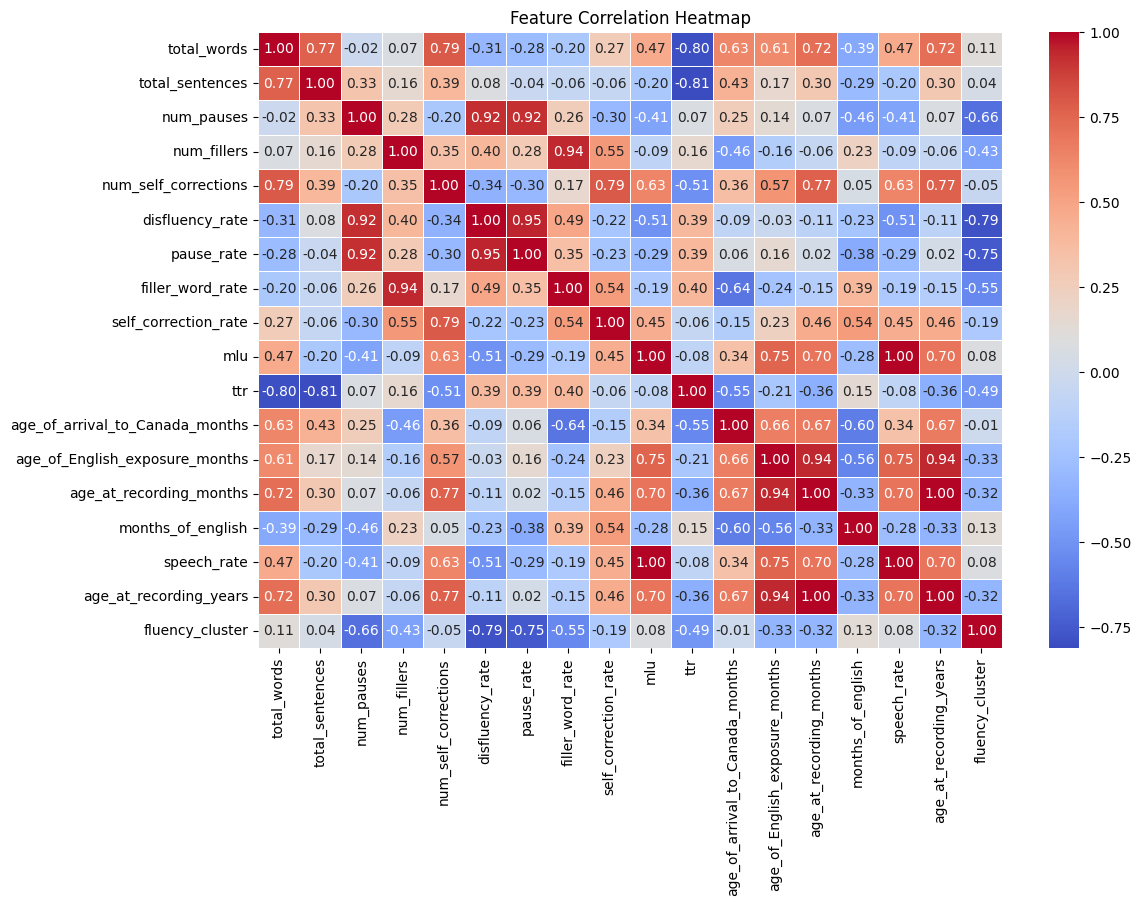

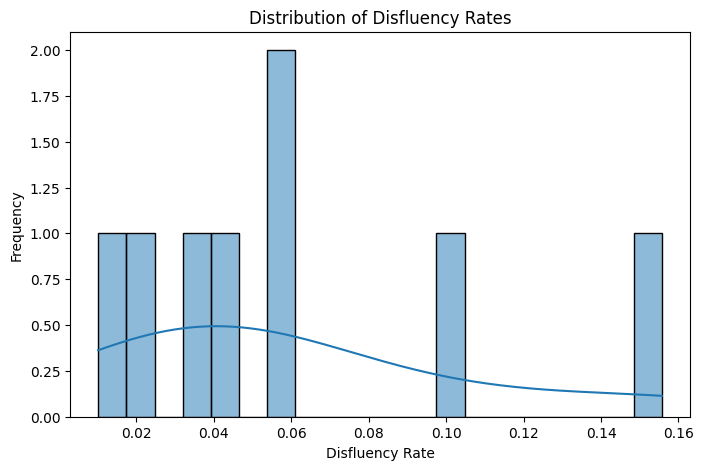

/tmp/ipython-input-2266253194.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="fluency_cluster", y="disfluency_rate", palette="coolwarm")


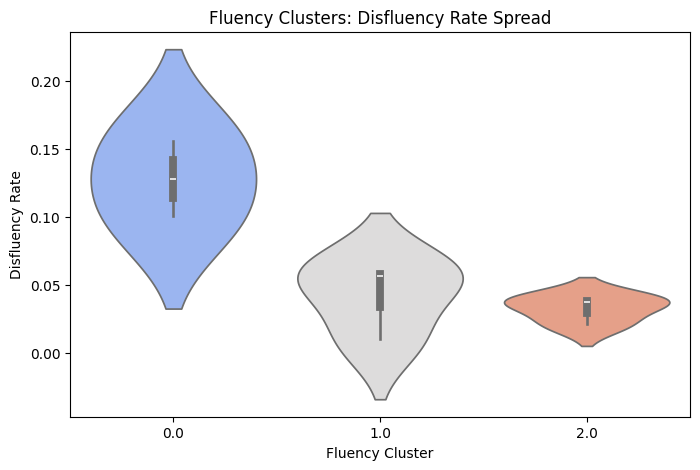

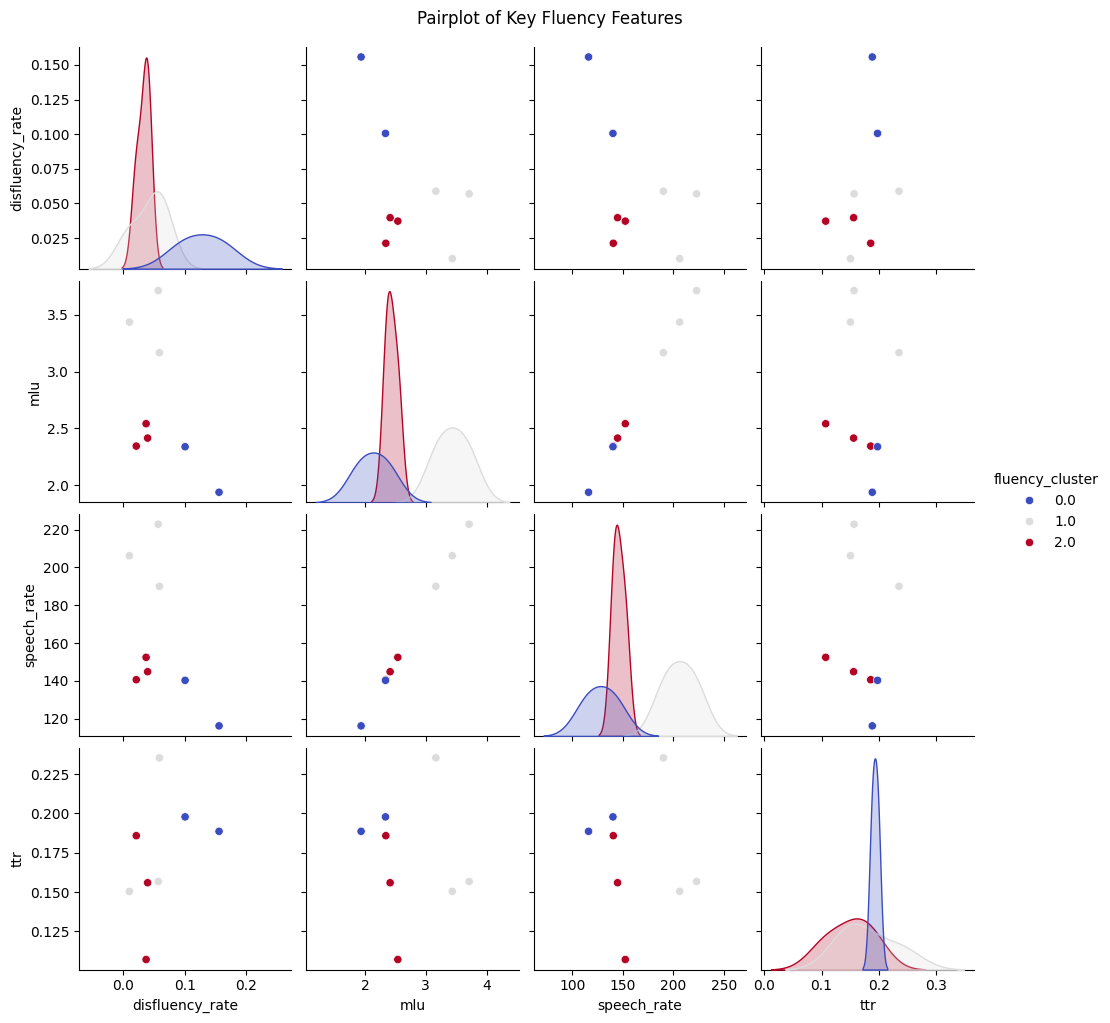

/tmp/ipython-input-2266253194.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="disfluency_rate", palette="coolwarm")


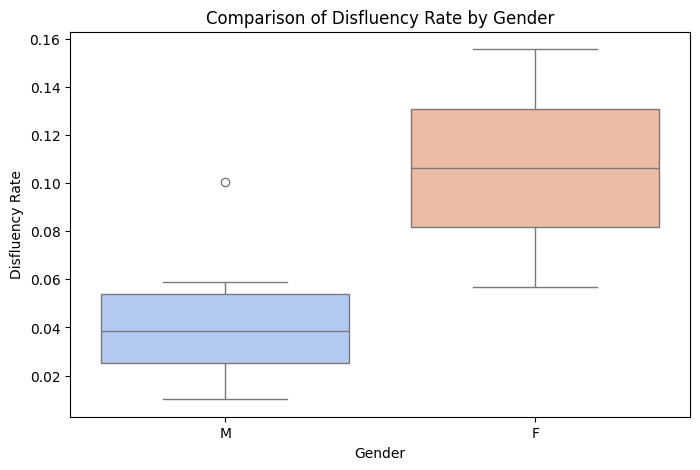


Dataset Summary:
 Total Files Processed  Unique Rounds  Fluency Clusters
                     8              1                 3

 Statistical analysis, visualizations, and machine learning models executed!


In [64]:
from google.colab import drive
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import scipy.stats as stats

# Mount Google Drive
if not os.path.exists("/content/drive/MyDrive"):
    drive.mount('/content/drive')

# Define paths
PARADIS_FOLDER = "/content/drive/MyDrive/Yoni/Paradis/"  # Updated main folder path
GUIDE_CSV = os.path.join(PARADIS_FOLDER, "guide_to_files.csv")  # Ensure metadata file exists

# Load metadata CSV
df_guide = pd.read_csv(GUIDE_CSV)

# DEFINE REGULAR EXPRESSIONS FOR DISFLUENCY & COMPLEXITY METRICS
PAUSE_PATTERN = re.compile(r"\(\.\)|\(..\)")
FILLER_PATTERN = re.compile(r"&-um|&ah|&mm")
SELF_CORRECTION_PATTERN = re.compile(r"\[///\]")
WORD_PATTERN = re.compile(r"\b\w+\b")

# FUNCTION TO PROCESS A SINGLE .cha FILE
def process_cha_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()

    child_speech = []
    for line in lines:
        if line.startswith("*CHI:"):
            speech = line.split(":", 1)[1].strip()
            child_speech.append(speech)

    speech_text = " ".join(child_speech)

    # Count disfluencies
    num_pauses = len(PAUSE_PATTERN.findall(speech_text))
    num_fillers = len(FILLER_PATTERN.findall(speech_text))
    num_self_corrections = len(SELF_CORRECTION_PATTERN.findall(speech_text))
    words = WORD_PATTERN.findall(speech_text)
    unique_words = set(words)
    total_words = len(words)
    total_sentences = len(re.split(r"[.!?]", speech_text))

    total_words = max(total_words, 1)
    total_sentences = max(total_sentences, 1)

    # Compute additional complexity metrics
    mlu = total_words / total_sentences
    ttr = len(unique_words) / total_words

    return {
        "file_name": os.path.basename(file_path),
        "folder": os.path.basename(os.path.dirname(file_path)),  # Track which round folder the file is from
        "total_words": total_words,
        "total_sentences": total_sentences,
        "num_pauses": num_pauses,
        "num_fillers": num_fillers,
        "num_self_corrections": num_self_corrections,
        "disfluency_rate": (num_pauses + num_fillers + num_self_corrections) / total_words,
        "pause_rate": num_pauses / total_sentences,
        "filler_word_rate": num_fillers / total_words,
        "self_correction_rate": num_self_corrections / total_words,
        "mlu": mlu,
        "ttr": ttr
    }

# RECURSIVELY PROCESS ALL .cha FILES IN THE Paradis DATASET
results = []
for root, _, files in os.walk(PARADIS_FOLDER):  # Recursively scan all subdirectories (round1, round2, etc.)
    for filename in files:
        if filename.endswith(".cha"):
            file_path = os.path.join(root, filename)
            results.append(process_cha_file(file_path))

df_disfluencies = pd.DataFrame(results)

# Merge with metadata
df_merged = df_disfluencies.merge(df_guide, on="file_name", how="left")

# ADDITIONAL SPEECH FLUENCY METRICS
df_merged["speech_rate"] = df_merged["total_words"] / (df_merged["total_sentences"] / 60)
df_merged["age_at_recording_years"] = df_merged["age_at_recording_months"] / 12

# DATA CLEANING
df_cleaned = df_merged.dropna(subset=["age_at_recording_years", "disfluency_rate", "mlu", "first_language", "gender", "ttr"])
df_cleaned = df_cleaned[~df_cleaned.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# K-MEANS CLUSTERING
if "fluency_cluster" not in df_cleaned.columns:
    clustering_features = df_cleaned[["disfluency_rate", "mlu", "speech_rate"]].dropna()

    if not clustering_features.empty:
        scaler = StandardScaler()
        clustering_scaled = scaler.fit_transform(clustering_features)

        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        df_cleaned.loc[clustering_features.index, "fluency_cluster"] = kmeans.fit_predict(clustering_scaled)

# DATA VISUALIZATIONS
def plot_visualizations(df):
    """ Function to plot all visualizations """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.histplot(df["disfluency_rate"], bins=20, kde=True)
    plt.xlabel("Disfluency Rate")
    plt.ylabel("Frequency")
    plt.title("Distribution of Disfluency Rates")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df, x="fluency_cluster", y="disfluency_rate", palette="coolwarm")
    plt.xlabel("Fluency Cluster")
    plt.ylabel("Disfluency Rate")
    plt.title("Fluency Clusters: Disfluency Rate Spread")
    plt.show()

    sns.pairplot(df, vars=["disfluency_rate", "mlu", "speech_rate", "ttr"], hue="fluency_cluster", palette="coolwarm")
    plt.suptitle("Pairplot of Key Fluency Features", y=1.02)
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="gender", y="disfluency_rate", palette="coolwarm")
    plt.xlabel("Gender")
    plt.ylabel("Disfluency Rate")
    plt.title("Comparison of Disfluency Rate by Gender")
    plt.show()

# Run the function
plot_visualizations(df_cleaned)

#  RESULTS SUMMARY
df_results = pd.DataFrame({
    "Total Files Processed": [len(df_cleaned)],
    "Unique Rounds": [df_cleaned["folder"].nunique()],
    "Fluency Clusters": [df_cleaned["fluency_cluster"].nunique()]
})

print("\nDataset Summary:")
print(df_results.to_string(index=False))

print("\n Statistical analysis, visualizations, and machine learning models executed!")